# Discogs API - Fetching data on all releases by style and storing in a CSV

# Jungle Pull

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "JungleScraper/1.0"
}

CSV_FILE = "discogs_jungle.csv"

# Load existing IDs to avoid duplicates
existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

# The key fix: use style= parameter and split by year to avoid 10k limit
for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",  # Use style taxonomy, not query
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)  # Rate limit: 60/min
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

# Append to CSV
if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

# Ghettotech

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettotechScraper/1.0"
}

CSV_FILE = "discogs_ghettotech.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghettotech",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Breakbeat Pull

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatScraper/1.0"
}

CSV_FILE = "discogs_breakbeat.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Breakbeat + Hardcore Pull - with filtering

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            # Only keep if it has BOTH Breakbeat and Hardcore
            if 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Drum and Bass

In [17]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DnBScraper/1.0"
}

CSV_FILE = "discogs_dnb.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Drum n Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 1 new releases
1993: 344 new releases
1994: 1479 new releases
1995: 2579 new releases
1996: 3461 new releases
1997: 4657 new releases
1998: 4248 new releases
1999: 3550 new releases
2000: 3208 new releases
2001: 3193 new releases
2002: 3375 new releases
2003: 3466 new releases
2004: 3570 new releases
2005: 3159 new releases
2006: 3463 new releases
2007: 3446 new releases
2008: 3836 new releases
2009: 3971 new releases
2010: 4366 new releases
2011: 5039 new releases
2012: 5404 new releases
2013: 5512 new releases
2014: 5363 new releases
2015: 5090 new releases
2016: 5193 new releases
2017: 4963 new releases
2018: 4845 new releases
2019: 4747 new releases
2020: 6064 new releases
2021: 5379 new releases
2022: 4346 new releases
2023: 4318 new releases
2024: 3801 new releases
2025: 3121 new releases

Added 132558 new releases to discogs_dnb.csv


# Breakbeat & House

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHouseScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'House' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Gabber

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GabberScraper/1.0"
}

CSV_FILE = "discogs_gabber.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Gabber",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Happy Hardcore

In [20]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Happy Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 35 new releases
1993: 216 new releases
1994: 1246 new releases
1995: 3527 new releases
1996: 3355 new releases
1997: 1798 new releases
1998: 767 new releases
1999: 625 new releases
2000: 450 new releases
2001: 408 new releases
2002: 561 new releases
2003: 514 new releases
2004: 674 new releases
2005: 832 new releases
2006: 795 new releases
2007: 889 new releases
2008: 955 new releases
2009: 930 new releases
2010: 989 new releases
2011: 1191 new releases
2012: 1163 new releases
2013: 1188 new releases
2014: 1166 new releases
2015: 1095 new releases
2016: 1098 new releases
2017: 992 new releases
2018: 823 new releases
2019: 1018 new releases
2020: 1021 new releases
2021: 1098 new releases
2022: 1074 new releases
2023: 949 new releases
2024: 640 new releases
2025: 422 new releases

Added 34505 new releases to discogs_happy_hardcore.csv


# Techno & Future Jazz

In [1]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TechnoFutureJazzScraper/1.0"
}

CSV_FILE = "discogs_techno_future_jazz.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Techno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Future Jazz' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 1 new releases
1991: 2 new releases
1993: 4 new releases
1994: 10 new releases
1995: 12 new releases
1996: 20 new releases
1997: 27 new releases
1998: 32 new releases
1999: 30 new releases
2000: 29 new releases
2001: 48 new releases
2002: 48 new releases
2003: 47 new releases
2004: 41 new releases
2005: 22 new releases
2006: 36 new releases
2007: 9 new releases
2008: 2 new releases
2011: 2 new releases

Added 422 new releases to discogs_techno_future_jazz.csv


# Ghetto House

In [22]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettoHouseScraper/1.0"
}

CSV_FILE = "discogs_ghetto_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghetto House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1989: 2 new releases
1991: 4 new releases
1992: 3 new releases
1993: 14 new releases
1994: 60 new releases
1995: 166 new releases
1996: 172 new releases
1997: 175 new releases
1998: 76 new releases
1999: 61 new releases
2000: 47 new releases
2001: 31 new releases
2002: 35 new releases
2003: 24 new releases
2004: 33 new releases
2005: 27 new releases
2006: 49 new releases
2007: 42 new releases
2008: 95 new releases
2009: 96 new releases
2010: 94 new releases
2011: 122 new releases
2012: 114 new releases
2013: 172 new releases
2014: 183 new releases
2015: 173 new releases
2016: 176 new releases
2017: 130 new releases
2018: 124 new releases
2019: 118 new releases
2020: 171 new releases
2021: 132 new releases
2022: 99 new releases
2023: 87 new releases
2024: 61 new releases
2025: 35 new releases

Added 3203 new releases to discogs_ghetto_house.csv


# Juke

In [23]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "JukeScraper/1.0"
}

CSV_FILE = "discogs_juke.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Juke",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 4 new releases
1997: 3 new releases
1998: 10 new releases
1999: 6 new releases
2000: 8 new releases
2001: 5 new releases
2002: 9 new releases
2003: 6 new releases
2004: 11 new releases
2005: 6 new releases
2006: 6 new releases
2007: 25 new releases
2008: 41 new releases
2009: 24 new releases
2010: 47 new releases
2011: 121 new releases
2012: 231 new releases
2013: 454 new releases
2014: 519 new releases
2015: 485 new releases
2016: 467 new releases
2017: 383 new releases
2018: 372 new releases
2019: 299 new releases
2020: 299 new releases
2021: 219 new releases
2022: 159 new releases
2023: 165 new releases
2024: 106 new releases
2025: 83 new releases

Added 4573 new releases to discogs_juke.csv


# Footwork

In [24]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "FootworkScraper/1.0"
}

CSV_FILE = "discogs_footwork.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2005, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Footwork",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2007: 6 new releases
2008: 8 new releases
2009: 5 new releases
2010: 42 new releases
2011: 52 new releases
2012: 85 new releases
2013: 110 new releases
2014: 132 new releases
2015: 174 new releases
2016: 175 new releases
2017: 155 new releases
2018: 200 new releases
2019: 245 new releases
2020: 419 new releases
2021: 399 new releases
2022: 313 new releases
2023: 281 new releases
2024: 240 new releases
2025: 141 new releases

Added 3182 new releases to discogs_footwork.csv


# Electro

In [25]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ElectroScraper/1.0"
}

CSV_FILE = "discogs_electro.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Electro",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 554 new releases
1981: 955 new releases
1982: 1911 new releases
1983: 3791 new releases
1984: 4637 new releases
1985: 4079 new releases
1986: 3412 new releases
1987: 2872 new releases
1988: 2941 new releases
1989: 2192 new releases
1990: 1837 new releases
1991: 1665 new releases
1992: 1534 new releases
1993: 1599 new releases
1994: 1713 new releases
1995: 2068 new releases
1996: 2482 new releases
1997: 3028 new releases
1998: 3708 new releases
1999: 3637 new releases
2000: 3811 new releases
2001: 4327 new releases
2002: 5567 new releases
2003: 6326 new releases
2004: 7109 new releases
2005: 7402 new releases
2006: 7458 new releases
2007: 7413 new releases
2008: 7496 new releases
2009: 7602 new releases
2010: 7714 new releases
2011: 7335 new releases
2012: 7589 new releases
2013: 7314 new releases
2014: 7460 new releases
2015: 7908 new releases
2016: 7436 new releases
2017: 7630 new releases
2018: 7682 new releases
2019: 7841 new releases
2020: 7686 new releases
2021: 7520 new rel

# Breakbeat & Happy Hardcore

In [26]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Happy Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 9 new releases
1993: 69 new releases
1994: 364 new releases
1995: 431 new releases
1996: 268 new releases
1997: 107 new releases
1998: 59 new releases
1999: 49 new releases
2000: 38 new releases
2001: 43 new releases
2002: 70 new releases
2003: 72 new releases
2004: 75 new releases
2005: 67 new releases
2006: 52 new releases
2007: 64 new releases
2008: 51 new releases
2009: 62 new releases
2010: 63 new releases
2011: 78 new releases
2012: 77 new releases
2013: 78 new releases
2014: 58 new releases
2015: 81 new releases
2016: 80 new releases
2017: 82 new releases
2018: 53 new releases
2019: 78 new releases
2020: 92 new releases
2021: 96 new releases
2022: 107 new releases
2023: 83 new releases
2024: 79 new releases
2025: 91 new releases

Added 3226 new releases to discogs_breakbeat_happy_hardcore.csv


# Bleep

In [27]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BleepScraper/1.0"
}

CSV_FILE = "discogs_bleep.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Bleep",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 5 new releases
1989: 41 new releases
1990: 452 new releases
1991: 498 new releases
1992: 139 new releases
1993: 17 new releases
1994: 5 new releases
1995: 3 new releases
1996: 7 new releases
1997: 1 new releases
1999: 15 new releases
2000: 1 new releases
2001: 3 new releases
2002: 6 new releases
2003: 3 new releases
2004: 4 new releases
2005: 4 new releases
2006: 7 new releases
2007: 5 new releases
2008: 9 new releases
2009: 8 new releases
2010: 5 new releases
2011: 13 new releases
2012: 5 new releases
2013: 5 new releases
2014: 6 new releases
2015: 12 new releases
2016: 13 new releases
2017: 26 new releases
2018: 22 new releases
2019: 46 new releases
2020: 164 new releases
2021: 158 new releases
2022: 98 new releases
2023: 111 new releases
2024: 94 new releases
2025: 77 new releases

Added 2088 new releases to discogs_bleep.csv


# Breakbeat, Hardcore, techno

In [28]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreTechnoScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_techno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 45 new releases
1991: 547 new releases
1992: 1014 new releases
1993: 363 new releases
1994: 127 new releases
1995: 85 new releases
1996: 68 new releases
1997: 82 new releases
1998: 26 new releases
1999: 28 new releases
2000: 28 new releases
2001: 33 new releases
2002: 44 new releases
2003: 19 new releases
2004: 45 new releases
2005: 36 new releases
2006: 26 new releases
2007: 20 new releases
2008: 44 new releases
2009: 30 new releases
2010: 34 new releases
2011: 38 new releases
2012: 31 new releases
2013: 28 new releases
2014: 20 new releases
2015: 34 new releases
2016: 47 new releases
2017: 54 new releases
2018: 67 new releases
2019: 87 new releases
2020: 71 new releases
2021: 81 new releases
2022: 68 new releases
2023: 63 new releases
2024: 45 new releases
2025: 46 new releases

Added 3524 new releases to discogs_breakbeat_hardcore_techno.csv


# Hardcore, jungle, techno

In [29]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreTechnoJungleScraper/1.0"
}

CSV_FILE = "discogs_hardcore_techno_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 26 new releases
1993: 70 new releases
1994: 58 new releases
1995: 34 new releases
1996: 18 new releases
1997: 29 new releases
1998: 9 new releases
1999: 6 new releases
2000: 5 new releases
2001: 8 new releases
2002: 10 new releases
2003: 11 new releases
2004: 9 new releases
2005: 16 new releases
2006: 11 new releases
2007: 12 new releases
2008: 7 new releases
2009: 9 new releases
2010: 7 new releases
2011: 15 new releases
2012: 9 new releases
2013: 19 new releases
2014: 9 new releases
2015: 12 new releases
2016: 20 new releases
2017: 19 new releases
2018: 35 new releases
2019: 54 new releases
2020: 28 new releases
2021: 42 new releases
2022: 29 new releases
2023: 35 new releases
2024: 13 new releases
2025: 17 new releases

Added 711 new releases to discogs_hardcore_techno_jungle.csv


# Jungle, techno

In [30]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "JungleTechnoScraper/1.0"
}

CSV_FILE = "discogs_jungle_techno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 38 new releases
1993: 89 new releases
1994: 92 new releases
1995: 93 new releases
1996: 92 new releases
1997: 113 new releases
1998: 66 new releases
1999: 34 new releases
2000: 33 new releases
2001: 29 new releases
2002: 32 new releases
2003: 30 new releases
2004: 26 new releases
2005: 39 new releases
2006: 38 new releases
2007: 30 new releases
2008: 27 new releases
2009: 39 new releases
2010: 32 new releases
2011: 62 new releases
2012: 59 new releases
2013: 64 new releases
2014: 80 new releases
2015: 71 new releases
2016: 90 new releases
2017: 97 new releases
2018: 133 new releases
2019: 184 new releases
2020: 234 new releases
2021: 184 new releases
2022: 149 new releases
2023: 169 new releases
2024: 82 new releases
2025: 82 new releases

Added 2712 new releases to discogs_jungle_techno.csv


# Italo House

In [31]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ItaloHouseScraper/1.0"
}

CSV_FILE = "discogs_italo_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1986, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Italo House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1986: 32 new releases
1987: 117 new releases
1988: 310 new releases
1989: 752 new releases
1990: 1202 new releases
1991: 1262 new releases
1992: 827 new releases
1993: 432 new releases
1994: 322 new releases
1995: 204 new releases
1996: 166 new releases
1997: 151 new releases
1998: 152 new releases
1999: 166 new releases
2000: 160 new releases
2001: 112 new releases
2002: 101 new releases
2003: 111 new releases
2004: 136 new releases
2005: 113 new releases
2006: 149 new releases
2007: 165 new releases
2008: 142 new releases
2009: 258 new releases
2010: 233 new releases
2011: 154 new releases
2012: 157 new releases
2013: 152 new releases
2014: 146 new releases
2015: 161 new releases
2016: 150 new releases
2017: 159 new releases
2018: 154 new releases
2019: 191 new releases
2020: 228 new releases
2021: 182 new releases
2022: 205 new releases
2023: 198 new releases
2024: 222 new releases
2025: 171 new releases

Added 10405 new releases to discogs_italo_house.csv


# Freetekno

In [32]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "FreeteknoScraper/1.0"
}

CSV_FILE = "discogs_freetekno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Freetekno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1993: 6 new releases
1994: 7 new releases
1995: 41 new releases
1996: 79 new releases
1997: 139 new releases
1998: 207 new releases
1999: 256 new releases
2000: 329 new releases
2001: 230 new releases
2002: 238 new releases
2003: 283 new releases
2004: 294 new releases
2005: 331 new releases
2006: 333 new releases
2007: 349 new releases
2008: 312 new releases
2009: 308 new releases
2010: 233 new releases
2011: 274 new releases
2012: 254 new releases
2013: 237 new releases
2014: 208 new releases
2015: 191 new releases
2016: 297 new releases
2017: 262 new releases
2018: 393 new releases
2019: 365 new releases
2020: 426 new releases
2021: 483 new releases
2022: 366 new releases
2023: 413 new releases
2024: 409 new releases
2025: 358 new releases

Added 8911 new releases to discogs_freetekno.csv


# Makina

In [33]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "MakinaScraper/1.0"
}

CSV_FILE = "discogs_makina.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Makina",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 1 new releases
1991: 5 new releases
1992: 35 new releases
1993: 209 new releases
1994: 528 new releases
1995: 663 new releases
1996: 782 new releases
1997: 541 new releases
1998: 348 new releases
1999: 300 new releases
2000: 343 new releases
2001: 383 new releases
2002: 270 new releases
2003: 232 new releases
2004: 226 new releases
2005: 240 new releases
2006: 199 new releases
2007: 179 new releases
2008: 194 new releases
2009: 254 new releases
2010: 244 new releases
2011: 256 new releases
2012: 257 new releases
2013: 360 new releases
2014: 325 new releases
2015: 270 new releases
2016: 216 new releases
2017: 221 new releases
2018: 274 new releases
2019: 178 new releases
2020: 219 new releases
2021: 304 new releases
2022: 248 new releases
2023: 212 new releases
2024: 153 new releases
2025: 130 new releases

Added 9799 new releases to discogs_makina.csv


# Tribal

In [35]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TribalScraper/1.0"
}

CSV_FILE = "discogs_tribal.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Tribal",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 97 new releases
1986: 92 new releases
1987: 132 new releases
1988: 192 new releases
1989: 270 new releases
1990: 328 new releases
1991: 383 new releases
1992: 744 new releases
1993: 883 new releases
1994: 1336 new releases
1995: 1292 new releases
1996: 1330 new releases
1997: 1288 new releases
1998: 1296 new releases
1999: 1348 new releases
2000: 1604 new releases
2001: 2108 new releases
2002: 2283 new releases
2003: 2476 new releases
2004: 2019 new releases
2005: 1684 new releases
2006: 1494 new releases
2007: 1375 new releases
2008: 1306 new releases
2009: 1351 new releases
2010: 1299 new releases
2011: 1030 new releases
2012: 1126 new releases
2013: 996 new releases
2014: 971 new releases
2015: 1056 new releases
2016: 1241 new releases
2017: 1261 new releases
2018: 1412 new releases
2019: 1443 new releases
2020: 1582 new releases
2021: 1331 new releases
2022: 973 new releases
2023: 1112 new releases
2024: 937 new releases
2025: 724 new releases

Added 47205 new releases to dis

# Freetekno, tribal

In [36]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TribalFreeteknoScraper/1.0"
}

CSV_FILE = "discogs_tribal_freetekno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Tribal",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Freetekno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1994: 2 new releases
1995: 5 new releases
1996: 22 new releases
1997: 47 new releases
1998: 60 new releases
1999: 62 new releases
2000: 98 new releases
2001: 85 new releases
2002: 78 new releases
2003: 125 new releases
2004: 90 new releases
2005: 109 new releases
2006: 90 new releases
2007: 97 new releases
2008: 168 new releases
2009: 170 new releases
2010: 165 new releases
2011: 152 new releases
2012: 154 new releases
2013: 115 new releases
2014: 100 new releases
2015: 101 new releases
2016: 153 new releases
2017: 134 new releases
2018: 272 new releases
2019: 260 new releases
2020: 209 new releases
2021: 261 new releases
2022: 102 new releases
2023: 105 new releases
2024: 76 new releases
2025: 99 new releases

Added 3766 new releases to discogs_tribal_freetekno.csv


# Hip Hop, Breakbeat

In [37]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HiphopBreakbeatScraper/1.0"
}

CSV_FILE = "discogs_hiphop_breakbeat.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hip Hop' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 1 new releases
1983: 7 new releases
1984: 11 new releases
1985: 4 new releases
1986: 10 new releases
1987: 6 new releases
1988: 21 new releases
1989: 19 new releases
1990: 73 new releases
1991: 55 new releases
1992: 38 new releases
1993: 34 new releases
1994: 31 new releases
1995: 22 new releases
1996: 51 new releases
1997: 65 new releases
1998: 96 new releases
1999: 143 new releases
2000: 117 new releases
2001: 96 new releases
2002: 155 new releases
2003: 107 new releases
2004: 143 new releases
2005: 164 new releases
2006: 151 new releases
2007: 134 new releases
2008: 107 new releases
2009: 143 new releases
2010: 121 new releases
2011: 159 new releases
2012: 153 new releases
2013: 170 new releases
2014: 127 new releases
2015: 93 new releases
2016: 89 new releases
2017: 62 new releases
2018: 80 new releases
2019: 61 new releases
2020: 89 new releases
2021: 69 new releases
2022: 50 new releases
2023: 42 new releases
2024: 32 new releases
2025: 32 new releases

Added 3433 new relea

# Uk Funky



In [34]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "UKFunkyScraper/1.0"
}

CSV_FILE = "discogs_uk_funky.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2006, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "UK Funky",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2006: 8 new releases
2007: 19 new releases
2008: 73 new releases
2009: 185 new releases
2010: 97 new releases
2011: 47 new releases
2012: 46 new releases
2013: 16 new releases
2014: 11 new releases
2015: 15 new releases
2016: 23 new releases
2017: 34 new releases
2018: 110 new releases
2019: 100 new releases
2020: 112 new releases
2021: 85 new releases
2022: 79 new releases
2023: 63 new releases
2024: 45 new releases
2025: 25 new releases

Added 1193 new releases to discogs_uk_funky.csv


# Uk Garage

In [41]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "UKGarageScraper/1.0"
}

CSV_FILE = "discogs_uk_garage.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1994, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "UK Garage",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1994: 17 new releases
1995: 110 new releases
1996: 258 new releases
1997: 1206 new releases
1998: 2068 new releases
1999: 1763 new releases
2000: 2963 new releases
2001: 2858 new releases
2002: 1997 new releases
2003: 1323 new releases
2004: 908 new releases
2005: 734 new releases
2006: 569 new releases
2007: 585 new releases
2008: 658 new releases
2009: 579 new releases
2010: 833 new releases
2011: 1006 new releases
2012: 1117 new releases
2013: 996 new releases
2014: 825 new releases
2015: 709 new releases
2016: 648 new releases
2017: 721 new releases
2018: 903 new releases
2019: 923 new releases
2020: 1093 new releases
2021: 1283 new releases
2022: 1052 new releases
2023: 908 new releases
2024: 888 new releases
2025: 845 new releases

Added 33346 new releases to discogs_uk_garage.csv


# Bassline

In [40]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BasslineScraper/1.0"
}

CSV_FILE = "discogs_bassline.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2002, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Bassline",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

Loaded 5613 existing releases


KeyboardInterrupt: 

# Speed Garage

In [42]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "SpeedGarageScraper/1.0"
}

CSV_FILE = "discogs_speed_garage.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1996, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Speed Garage",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 60 new releases
1997: 1158 new releases
1998: 1391 new releases
1999: 257 new releases
2000: 139 new releases
2001: 113 new releases
2002: 111 new releases
2003: 106 new releases
2004: 211 new releases
2005: 291 new releases
2006: 236 new releases
2007: 189 new releases
2008: 234 new releases
2009: 149 new releases
2010: 95 new releases
2011: 75 new releases
2012: 48 new releases
2013: 45 new releases
2014: 81 new releases
2015: 64 new releases
2016: 78 new releases
2017: 41 new releases
2018: 54 new releases
2019: 71 new releases
2020: 87 new releases
2021: 142 new releases
2022: 208 new releases
2023: 171 new releases
2024: 204 new releases
2025: 183 new releases

Added 6292 new releases to discogs_speed_garage.csv


# Ghetto

In [43]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettoScraper/1.0"
}

CSV_FILE = "discogs_ghetto.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghetto",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 1 new releases
1987: 6 new releases
1988: 2 new releases
1989: 6 new releases
1990: 10 new releases
1991: 7 new releases
1992: 19 new releases
1993: 28 new releases
1994: 84 new releases
1995: 168 new releases
1996: 187 new releases
1997: 204 new releases
1998: 103 new releases
1999: 90 new releases
2000: 69 new releases
2001: 61 new releases
2002: 67 new releases
2003: 59 new releases
2004: 86 new releases
2005: 93 new releases
2006: 161 new releases
2007: 147 new releases
2008: 228 new releases
2009: 212 new releases
2010: 183 new releases
2011: 266 new releases
2012: 362 new releases
2013: 345 new releases
2014: 258 new releases
2015: 251 new releases
2016: 244 new releases
2017: 182 new releases
2018: 197 new releases
2019: 190 new releases
2020: 260 new releases
2021: 216 new releases
2022: 158 new releases
2023: 122 new releases
2024: 87 new releases
2025: 53 new releases

Added 5472 new releases to discogs_ghetto.csv


# Miami Bass

In [44]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "MiamiBassScraper/1.0"
}

CSV_FILE = "discogs_miami_bass.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1984, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Miami Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1984: 2 new releases
1985: 4 new releases
1986: 37 new releases
1987: 94 new releases
1988: 112 new releases
1989: 132 new releases
1990: 153 new releases
1991: 147 new releases
1992: 87 new releases
1993: 99 new releases
1994: 96 new releases
1995: 77 new releases
1996: 128 new releases
1997: 101 new releases
1998: 97 new releases
1999: 98 new releases
2000: 68 new releases
2001: 30 new releases
2002: 32 new releases
2003: 28 new releases
2004: 10 new releases
2005: 17 new releases
2006: 13 new releases
2007: 17 new releases
2008: 24 new releases
2009: 26 new releases
2010: 9 new releases
2011: 9 new releases
2012: 9 new releases
2013: 25 new releases
2014: 38 new releases
2015: 24 new releases
2016: 31 new releases
2017: 40 new releases
2018: 29 new releases
2019: 27 new releases
2020: 40 new releases
2021: 28 new releases
2022: 45 new releases
2023: 39 new releases
2024: 31 new releases
2025: 16 new releases

Added 2169 new releases to discogs_miami_bass.csv


# Baltimore Club

In [45]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BaltimoreClubScraper/1.0"
}

CSV_FILE = "discogs_baltimore_club.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Baltimore Club",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 5 new releases
1992: 9 new releases
1993: 15 new releases
1994: 15 new releases
1995: 30 new releases
1996: 36 new releases
1997: 29 new releases
1998: 50 new releases
1999: 32 new releases
2000: 26 new releases
2001: 28 new releases
2002: 32 new releases
2003: 15 new releases
2004: 3 new releases
2005: 21 new releases
2006: 37 new releases
2007: 35 new releases
2008: 51 new releases
2009: 25 new releases
2010: 9 new releases
2011: 17 new releases
2012: 28 new releases
2013: 25 new releases
2014: 37 new releases
2015: 42 new releases
2016: 44 new releases
2017: 34 new releases
2018: 36 new releases
2019: 33 new releases
2020: 41 new releases
2021: 43 new releases
2022: 35 new releases
2023: 43 new releases
2024: 17 new releases
2025: 25 new releases

Added 1003 new releases to discogs_baltimore_club.csv


# Donk

In [47]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DonkScraper/1.0"
}

CSV_FILE = "discogs_donk.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2000, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Donk",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2000: 68 new releases
2001: 72 new releases
2002: 65 new releases
2003: 110 new releases
2004: 206 new releases
2005: 325 new releases
2006: 355 new releases
2007: 322 new releases
2008: 297 new releases
2009: 195 new releases
2010: 71 new releases
2011: 83 new releases
2012: 124 new releases
2013: 169 new releases
2014: 118 new releases
2015: 179 new releases
2016: 198 new releases
2017: 229 new releases
2018: 274 new releases
2019: 325 new releases
2020: 402 new releases
2021: 392 new releases
2022: 380 new releases
2023: 187 new releases
2024: 168 new releases
2025: 105 new releases

Added 5419 new releases to discogs_donk.csv


# Techno, Deep Techno, Acid

In [2]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TechnoDeepAcidScraper/1.0"
}

CSV_FILE = "discogs_techno_deep_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Techno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Deep Techno' in styles and 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 2 new releases
1993: 1 new releases
1994: 5 new releases
1995: 1 new releases
1996: 3 new releases
1997: 4 new releases
1998: 1 new releases
2000: 1 new releases
2003: 1 new releases
2004: 1 new releases
2006: 3 new releases
2010: 1 new releases
2012: 1 new releases
2013: 3 new releases
2015: 3 new releases
2016: 16 new releases
2019: 10 new releases
2021: 15 new releases
2022: 11 new releases
2023: 7 new releases
2024: 8 new releases
2025: 12 new releases

Added 111 new releases to discogs_techno_deep_acid.csv


# Breakbeat, Acid

In [49]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatAcidScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1987, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 1 new releases
1989: 9 new releases
1990: 30 new releases
1991: 58 new releases
1992: 180 new releases
1993: 169 new releases
1994: 126 new releases
1995: 175 new releases
1996: 229 new releases
1997: 187 new releases
1998: 145 new releases
1999: 91 new releases
2000: 61 new releases
2001: 31 new releases
2002: 47 new releases
2003: 44 new releases
2004: 53 new releases
2005: 41 new releases
2006: 36 new releases
2007: 47 new releases
2008: 63 new releases
2009: 59 new releases
2010: 57 new releases
2011: 76 new releases
2012: 94 new releases
2013: 68 new releases
2014: 52 new releases
2015: 91 new releases
2016: 103 new releases
2017: 108 new releases
2018: 203 new releases
2019: 291 new releases
2020: 405 new releases
2021: 346 new releases
2022: 242 new releases
2023: 223 new releases
2024: 191 new releases
2025: 83 new releases

Added 4515 new releases to discogs_breakbeat_acid.csv


# Hardcore, Acid

In [52]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreAcidScraper/1.0"
}

CSV_FILE = "discogs_hardcore_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index_ids=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 3 new releases
1990: 7 new releases
1991: 64 new releases
1992: 226 new releases
1993: 461 new releases
1994: 401 new releases
1995: 214 new releases
1996: 127 new releases
1997: 155 new releases
1998: 109 new releases
1999: 65 new releases
2000: 27 new releases
2001: 45 new releases
2002: 43 new releases
2003: 32 new releases
2004: 32 new releases
2005: 38 new releases
2006: 37 new releases
2007: 30 new releases
2008: 23 new releases
2009: 17 new releases
2010: 29 new releases
2011: 14 new releases
2012: 18 new releases
2013: 11 new releases
2014: 10 new releases
2015: 21 new releases
2016: 11 new releases
2017: 33 new releases
2018: 21 new releases
2019: 19 new releases
2020: 11 new releases
2021: 13 new releases
2022: 13 new releases
2023: 5 new releases
2024: 8 new releases
2025: 30 new releases

Added 2423 new releases to discogs_hardcore_acid.csv


# Acid House

In [53]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "AcidHouseScraper/1.0"
}

CSV_FILE = "discogs_acid_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Acid House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 3 new releases
1986: 34 new releases
1987: 223 new releases
1988: 1775 new releases
1989: 2157 new releases
1990: 1225 new releases
1991: 893 new releases
1992: 957 new releases
1993: 888 new releases
1994: 985 new releases
1995: 1368 new releases
1996: 1454 new releases
1997: 1004 new releases
1998: 656 new releases
1999: 574 new releases
2000: 474 new releases
2001: 556 new releases
2002: 575 new releases
2003: 570 new releases
2004: 693 new releases
2005: 826 new releases
2006: 728 new releases
2007: 636 new releases
2008: 549 new releases
2009: 619 new releases
2010: 744 new releases
2011: 891 new releases
2012: 925 new releases
2013: 1008 new releases
2014: 1144 new releases
2015: 1200 new releases
2016: 1210 new releases
2017: 1315 new releases
2018: 1179 new releases
2019: 1260 new releases
2020: 1409 new releases
2021: 1186 new releases
2022: 1134 new releases
2023: 1031 new releases
2024: 917 new releases
2025: 886 new releases

Added 37861 new releases to discogs_acid_h

# Breakbeat, Hardcore, Jungle

In [54]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreJungleScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 321 new releases
1993: 1085 new releases
1994: 366 new releases
1995: 94 new releases
1996: 38 new releases
1997: 42 new releases
1998: 17 new releases
1999: 16 new releases
2000: 30 new releases
2001: 32 new releases
2002: 27 new releases
2003: 21 new releases
2004: 24 new releases
2005: 37 new releases
2006: 18 new releases
2007: 21 new releases
2008: 36 new releases
2009: 42 new releases
2010: 38 new releases
2011: 57 new releases
2012: 33 new releases
2013: 64 new releases
2014: 49 new releases
2015: 51 new releases
2016: 84 new releases
2017: 94 new releases
2018: 107 new releases
2019: 132 new releases
2020: 171 new releases
2021: 220 new releases
2022: 247 new releases
2023: 170 new releases
2024: 172 new releases
2025: 191 new releases

Added 4147 new releases to discogs_breakbeat_hardcore_jungle.csv


# Hardcore, Jungle

In [55]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreJungleScraper/1.0"
}

CSV_FILE = "discogs_hardcore_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 411 new releases
1993: 1443 new releases
1994: 699 new releases
1995: 188 new releases
1996: 79 new releases
1997: 86 new releases
1998: 41 new releases
1999: 30 new releases
2000: 46 new releases
2001: 62 new releases
2002: 61 new releases
2003: 56 new releases
2004: 52 new releases
2005: 71 new releases
2006: 51 new releases
2007: 64 new releases
2008: 72 new releases
2009: 85 new releases
2010: 76 new releases
2011: 110 new releases
2012: 84 new releases
2013: 114 new releases
2014: 90 new releases
2015: 119 new releases
2016: 147 new releases
2017: 150 new releases
2018: 205 new releases
2019: 258 new releases
2020: 305 new releases
2021: 352 new releases
2022: 384 new releases
2023: 301 new releases
2024: 310 new releases
2025: 319 new releases

Added 6921 new releases to discogs_hardcore_jungle.csv


# Dub, Jungle

In [56]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DubJungleScraper/1.0"
}

CSV_FILE = "discogs_dub_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Dub' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 10 new releases
1993: 24 new releases
1994: 25 new releases
1995: 69 new releases
1996: 45 new releases
1997: 41 new releases
1998: 48 new releases
1999: 37 new releases
2000: 46 new releases
2001: 15 new releases
2002: 28 new releases
2003: 28 new releases
2004: 23 new releases
2005: 27 new releases
2006: 20 new releases
2007: 23 new releases
2008: 30 new releases
2009: 35 new releases
2010: 24 new releases
2011: 27 new releases
2012: 40 new releases
2013: 47 new releases
2014: 45 new releases
2015: 44 new releases
2016: 41 new releases
2017: 41 new releases
2018: 45 new releases
2019: 44 new releases
2020: 45 new releases
2021: 41 new releases
2022: 32 new releases
2023: 16 new releases
2024: 25 new releases
2025: 15 new releases

Added 1146 new releases to discogs_dub_jungle.csv


# Dubstep

In [57]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DubstepScraper/1.0"
}

CSV_FILE = "discogs_dubstep.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2000, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Dubstep",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2000: 2 new releases
2001: 25 new releases
2002: 38 new releases
2003: 73 new releases
2004: 105 new releases
2005: 146 new releases
2006: 447 new releases
2007: 952 new releases
2008: 1760 new releases
2009: 3423 new releases
2010: 4176 new releases
2011: 5442 new releases
2012: 5602 new releases
2013: 4248 new releases
2014: 3275 new releases
2015: 2889 new releases
2016: 2802 new releases
2017: 2458 new releases
2018: 2639 new releases
2019: 2437 new releases
2020: 2296 new releases
2021: 1882 new releases
2022: 1446 new releases
2023: 1316 new releases
2024: 1011 new releases
2025: 780 new releases

Added 51670 new releases to discogs_dubstep.csv


# Britcore, Breakbeat, Hardcore

In [58]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BritcoreBreakbeatHardcoreScraper/1.0"
}

CSV_FILE = "discogs_britcore_breakbeat_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Britcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 1 new releases
1991: 1 new releases
1992: 2 new releases
1994: 3 new releases
2013: 1 new releases

Added 8 new releases to discogs_britcore_breakbeat_hardcore.csv


# drum n bass, samba



In [60]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DnBSambaScraper/1.0"
}

CSV_FILE = "discogs_dnb_samba.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Drum n Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Samba' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 1 new releases
1998: 4 new releases
2000: 5 new releases
2001: 4 new releases
2002: 7 new releases
2003: 13 new releases
2004: 11 new releases
2005: 5 new releases
2006: 8 new releases
2007: 10 new releases
2008: 5 new releases
2009: 1 new releases
2010: 1 new releases
2011: 1 new releases
2015: 1 new releases
2017: 2 new releases
2018: 3 new releases
2019: 2 new releases
2024: 2 new releases

Added 86 new releases to discogs_dnb_samba.csv


# Electro, Funk

In [61]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ElectroFunkScraper/1.0"
}

CSV_FILE = "discogs_electro_funk.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Electro",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Funk' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 20 new releases
1981: 126 new releases
1982: 333 new releases
1983: 617 new releases
1984: 685 new releases
1985: 600 new releases
1986: 442 new releases
1987: 331 new releases
1988: 301 new releases
1989: 192 new releases
1990: 103 new releases
1991: 66 new releases
1992: 53 new releases
1993: 78 new releases
1994: 75 new releases
1995: 53 new releases
1996: 67 new releases
1997: 58 new releases
1998: 65 new releases
1999: 49 new releases
2000: 68 new releases
2001: 55 new releases
2002: 60 new releases
2003: 78 new releases
2004: 102 new releases
2005: 37 new releases
2006: 29 new releases
2007: 20 new releases
2008: 23 new releases
2009: 39 new releases
2010: 40 new releases
2011: 30 new releases
2012: 42 new releases
2013: 39 new releases
2014: 38 new releases
2015: 57 new releases
2016: 34 new releases
2017: 50 new releases
2018: 45 new releases
2019: 58 new releases
2020: 30 new releases
2021: 39 new releases
2022: 74 new releases
2023: 86 new releases
2024: 3 new releases


# breakbeat, hardcore, happy hardcore

In [4]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreHappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Happy Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 6 new releases
1993: 43 new releases
1994: 148 new releases
1995: 140 new releases
1996: 92 new releases
1997: 62 new releases
1998: 31 new releases
1999: 19 new releases
2000: 15 new releases
2001: 12 new releases
2002: 37 new releases
2003: 52 new releases
2004: 51 new releases
2005: 38 new releases
2006: 41 new releases
2007: 43 new releases
2008: 33 new releases
2009: 40 new releases
2010: 51 new releases
2011: 68 new releases
2012: 57 new releases
2013: 70 new releases
2014: 40 new releases
2015: 50 new releases
2016: 48 new releases
2017: 49 new releases
2018: 35 new releases
2019: 62 new releases
2020: 63 new releases
2021: 48 new releases
2022: 75 new releases
2023: 65 new releases
2024: 38 new releases
2025: 62 new releases

Added 1784 new releases to discogs_breakbeat_hardcore_happy_hardcore.csv


# Dj Battle Tool

In [3]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DJBattleToolScraper/1.0"
}

CSV_FILE = "discogs_dj_battle_tool.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "DJ Battle Tool",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 1 new releases
1981: 3 new releases
1983: 9 new releases
1984: 7 new releases
1985: 5 new releases
1986: 2 new releases
1987: 7 new releases
1988: 12 new releases
1989: 31 new releases
1990: 39 new releases
1991: 49 new releases
1992: 56 new releases
1993: 78 new releases
1994: 39 new releases
1995: 53 new releases
1996: 59 new releases
1997: 81 new releases
1998: 107 new releases
1999: 141 new releases
2000: 190 new releases
2001: 173 new releases
2002: 144 new releases
2003: 144 new releases
2004: 143 new releases
2005: 137 new releases
2006: 113 new releases
2007: 93 new releases
2008: 71 new releases
2009: 69 new releases
2010: 54 new releases
2011: 74 new releases
2012: 43 new releases
2013: 38 new releases
2014: 38 new releases
2015: 55 new releases
2016: 101 new releases
2017: 146 new releases
2018: 94 new releases
2019: 99 new releases
2020: 77 new releases
2021: 68 new releases
2022: 40 new releases
2023: 59 new releases
2024: 34 new releases
2025: 17 new releases

Added

# Cleaning the CSVs

I analysed the datasets and noticed that a lot of duplicates where appearing and some information wasn't in an ideal format. For this step i then decided to start by correcting the weblink as it was cuurently showing the api endpoint instead of taking you to the discogs release page. This was an easy fix as the API link had the same release identification ID contained within it as the web link for users. i ran a simple script to fix this issue and update every file within my dataset before further processing and splitting. 

The next step needed for cleaning was to remove duplicate releases. These appear often as many releases will have multiple versions such as "white label" early pressings, different pressings for releases in different countries, different label pressings, future represses and more. I wanted to keep the data of the other releases rather than just remove them as this may be useful for future reference or for allowing users to view the various versions of the same release. I created four new columns to contain the data for duplicates: alt_versions_link, alt_versions_catno, alt_versions_year, alt_versions_id. These feature columns will contain the data on duplicates at the end of the file and will help reduce the overall row count used for recommendations. 

I also realised that splitting the data on duplicates would need to be done separately for different media formats. This is because a CD for a release often contains different and more tracks than the vinyl release and so keeping both is wise. I wanted these to be stored in separate CSV files for each release as they often cater to different types of users (Some people often only collect CDs or Vinyl) whilst also keeping a main CSV with all the releases. I also kept the base files and backed them up incase any issues occured due to the amount of time and resources it took to pull the data in the previous steps. 

### Correcting the web link

In [6]:
import pandas as pd
import glob


# Fix resource_url in all CSV files - replace 'api.discogs.com/releases/' with 'www.discogs.com/release/'
# This is to correct the URLs so that they point to the releases web page instead of the API endpoint
for csv_file in glob.glob("discogs_*.csv"):
    df = pd.read_csv(csv_file)
    if 'resource_url' in df.columns:
        df['resource_url'] = df['resource_url'].str.replace('api.discogs.com/releases/', 'www.discogs.com/release/')
        df.to_csv(csv_file, index=False)
        print(f"Fixed {csv_file}")

Fixed discogs_breakbeat_hardcore_happy_hardcore.csv
Fixed discogs_italo_house.csv
Fixed discogs_breakbeat_hardcore_techno.csv
Fixed discogs_dubstep.csv
Fixed discogs_jungle.csv
Fixed discogs_hiphop_breakbeat.csv
Fixed discogs_bassline.csv
Fixed discogs_speed_garage.csv
Fixed discogs_hardcore_acid.csv
Fixed discogs_tribal_freetekno.csv
Fixed discogs_dj_battle_tool.csv
Fixed discogs_breakbeat_happy_hardcore.csv
Fixed discogs_ghettotech.csv
Fixed discogs_acid_house.csv
Fixed discogs_electro_funk.csv
Fixed discogs_happy_hardcore.csv
Fixed discogs_dub_jungle.csv
Fixed discogs_hardcore_jungle.csv
Fixed discogs_uk_funky.csv
Fixed discogs_uk_garage.csv
Fixed discogs_ghetto.csv
Fixed discogs_dnb.csv
Fixed discogs_makina.csv
Fixed discogs_miami_bass.csv
Fixed discogs_bleep.csv
Fixed discogs_donk.csv
Fixed discogs_dnb_samba.csv
Fixed discogs_breakbeat_acid.csv
Fixed discogs_jungle_techno.csv
Fixed discogs_footwork.csv
Fixed discogs_juke.csv
Fixed discogs_gabber.csv
Fixed discogs_breakbeat_house.c

### Removing duplicates & splitting by media format 

In [8]:
"""
DISCOGS DATA CLEANING PIPELINE v3 - JUPYTER NOTEBOOK VERSION
Cleans and splits Discogs CSV exports according to project specifications.

DUPLICATE RULES:
- Same title + same media type = duplicate (keep best, store alt info)
- Same title + different media type = NOT duplicate (keep both)
- Vinyl 12" and Vinyl 7" are same media type
- CD and Cassette are different media types
"""

import pandas as pd
import os
import re

# === CONFIGURABLE PARAMETERS ===
COMPILATION_STYLE_THRESHOLD = 5   # Styles > this = compilation
EMPTY_CATNO_PLACEHOLDER = 'N0N3 - 000'


def get_primary_format(format_str):
    """
    Extract primary format from format string.
    """
    if pd.isna(format_str):
        return 'Other'
    
    format_str = str(format_str)
    
    if 'Acetate' in format_str:
        return 'Dubplate'
    elif 'Vinyl' in format_str:
        return 'Vinyl'
    elif 'CD' in format_str:
        return 'CD'
    elif 'Cassette' in format_str:
        return 'Cassette'
    elif 'VHS' in format_str:
        return 'VHS'
    elif 'File' in format_str:
        return 'Digital'
    else:
        return 'Other'


def parse_artist_from_title(title):
    """
    Parse artist from title string.
    Format is typically "Artist - Track Name"
    """
    if pd.isna(title):
        return '', title
    
    title = str(title)
    
    if ' - ' in title:
        parts = title.split(' - ', 1)
        artist = parts[0].strip()
        track_name = parts[1].strip() if len(parts) > 1 else ''
        return artist, track_name
    else:
        return '', title


def clean_catno(catno):
    """
    Clean catalogue number - replace empty/none with placeholder.
    """
    if pd.isna(catno) or str(catno).lower().strip() in ['none', '', 'nan']:
        return EMPTY_CATNO_PLACEHOLDER
    return str(catno).strip()


def is_compilation(style_str):
    """
    Check if release is a compilation based on number of styles.
    """
    if pd.isna(style_str):
        return False
    
    styles = [s.strip() for s in str(style_str).split(',')]
    return len(styles) > COMPILATION_STYLE_THRESHOLD


def is_white_label(format_str):
    """
    Check if release is a white label.
    """
    if pd.isna(format_str):
        return False
    return 'white label' in str(format_str).lower()


def is_promo(format_str):
    """
    Check if release is a promo.
    """
    if pd.isna(format_str):
        return False
    return 'promo' in str(format_str).lower()


def is_test_pressing(format_str):
    """
    Check if release is a test pressing.
    """
    if pd.isna(format_str):
        return False
    return 'test pressing' in str(format_str).lower()


def get_format_priority(row):
    """
    Return priority score for determining primary release.
    Higher = better candidate for primary.
    """
    score = 0
    
    # Prefer non-white-label
    if not is_white_label(row['format']):
        score += 100
    
    # Prefer non-promo
    if not is_promo(row['format']):
        score += 50
    
    # Prefer non-test-pressing
    if not is_test_pressing(row['format']):
        score += 50
    
    # Has real label bonus
    if pd.notna(row['label']) and 'not on label' not in str(row['label']).lower():
        score += 80
    
    # Earlier year bonus (original pressing)
    if pd.notna(row['year']) and row['year'] > 0:
        score += (2030 - row['year'])
    
    return score


def clean_discogs_csv(input_path, output_base_folder):
    """
    Clean a single Discogs CSV file and split by format.
    """
    
    # Get filename without extension for naming
    filename = os.path.splitext(os.path.basename(input_path))[0]
    
    # Create output folder: split_<filename>
    output_folder = os.path.join(output_base_folder, f"split_{filename}")
    os.makedirs(output_folder, exist_ok=True)
    
    print(f"\n{'='*60}")
    print(f"Processing: {filename}")
    print(f"Output to: {output_folder}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(input_path)
    original_count = len(df)
    print(f"Loaded {original_count} releases")
    
    # Store original title
    df['original_title'] = df['title']
    
    # Parse artist from title
    df['parsed_artist'], df['track_name'] = zip(*df['title'].apply(parse_artist_from_title))
    
    # Extract primary format
    df['primary_format'] = df['format'].apply(get_primary_format)
    
    # Clean catalogue numbers
    df['catno_cleaned'] = df['catno'].apply(clean_catno)
    
    # Flag compilations
    df['is_compilation'] = df['style'].apply(is_compilation)
    
    # Add source file column
    df['source_file'] = filename
    
    # === HANDLE DUPLICATES ===
    print("\nDetecting duplicates (within same media type only)...")
    
    # Create matching keys
    df['title_lower'] = df['title'].str.lower().str.strip()
    
    # Calculate priority score for each release
    df['priority_score'] = df.apply(get_format_priority, axis=1)
    
    # Initialize alt_versions columns
    df['alt_versions_link'] = ''
    df['alt_versions_catno'] = ''
    df['alt_versions_year'] = ''
    df['alt_versions_id'] = ''
    
    # Track which rows to keep
    df['keep'] = True
    
    # === DUPLICATE DETECTION BY MEDIA TYPE ===
    duplicates_removed = 0
    
    # Group by title (case-insensitive) AND primary_format
    grouped = df.groupby(['title_lower', 'primary_format'])
    
    for (title_lower, media_type), group in grouped:
        if len(group) > 1:
            indices = group.index.tolist()
            
            # Find best version (highest priority score)
            best_idx = group['priority_score'].idxmax()
            
            # Collect alt versions info
            alt_links = []
            alt_catnos = []
            alt_years = []
            alt_ids = []
            
            for idx in indices:
                if idx != best_idx:
                    alt_links.append(str(df.loc[idx, 'resource_url']))
                    alt_catnos.append(str(df.loc[idx, 'catno_cleaned']))
                    alt_years.append(str(df.loc[idx, 'year']))
                    alt_ids.append(str(df.loc[idx, 'id']))
                    
                    df.loc[idx, 'keep'] = False
                    duplicates_removed += 1
            
            # Store alt info on the kept release
            if alt_links:
                df.loc[best_idx, 'alt_versions_link'] = ','.join(alt_links)
                df.loc[best_idx, 'alt_versions_catno'] = ','.join(alt_catnos)
                df.loc[best_idx, 'alt_versions_year'] = ','.join(alt_years)
                df.loc[best_idx, 'alt_versions_id'] = ','.join(alt_ids)
    
    print(f"  Found {duplicates_removed} duplicates (same title + same media type)")
    
    # Remove duplicates
    df_cleaned = df[df['keep'] == True].copy()
    
    # Clean up temp columns
    df_cleaned = df_cleaned.drop(columns=['title_lower', 'priority_score', 'keep'])
    
    # Reorder columns to put alt_versions at the end
    cols = [c for c in df_cleaned.columns if not c.startswith('alt_versions_')]
    alt_cols = ['alt_versions_link', 'alt_versions_catno', 'alt_versions_year', 'alt_versions_id']
    df_cleaned = df_cleaned[cols + alt_cols]
    
    # === STATS ===
    print(f"\n--- SUMMARY ---")
    print(f"Original releases: {original_count}")
    print(f"After deduplication: {len(df_cleaned)}")
    print(f"Duplicates removed: {duplicates_removed}")
    print(f"Compilations flagged: {df_cleaned['is_compilation'].sum()}")
    
    has_alt = (df_cleaned['alt_versions_id'] != '').sum()
    print(f"Releases with alt versions stored: {has_alt}")
    
    # === FORMAT BREAKDOWN ===
    print("\nFormat breakdown:")
    print(df_cleaned['primary_format'].value_counts().to_string())
    
    # === SAVE FILES ===
    print(f"\nSaving files to {output_folder}...")
    
    # Save full cleaned version
    full_path = os.path.join(output_folder, "cleaned_full.csv")
    df_cleaned.to_csv(full_path, index=False)
    print(f"  cleaned_full.csv: {len(df_cleaned)} releases")
    
    # Split by format
    formats = ['Vinyl', 'Dubplate', 'CD', 'Cassette', 'Digital', 'VHS', 'Other']
    
    for fmt in formats:
        fmt_df = df_cleaned[df_cleaned['primary_format'] == fmt]
        if len(fmt_df) > 0:
            fmt_path = os.path.join(output_folder, f"{fmt.lower()}.csv")
            fmt_df.to_csv(fmt_path, index=False)
            print(f"  {fmt.lower()}.csv: {len(fmt_df)} releases")
    
    print(f"\nDone! Original file unchanged: {input_path}")
    
    return df_cleaned


def process_all_csvs(input_folder, output_folder):
    """
    Process all CSV files in the input folder.
    """
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv') and f.startswith('discogs')]
    
    if not csv_files:
        print(f"No CSV files starting with 'discogs' found in {input_folder}")
        return
    
    print(f"Found {len(csv_files)} CSV files to process:")
    for f in csv_files:
        print(f"  - {f}")
    
    for csv_file in csv_files:
        input_path = os.path.join(input_folder, csv_file)
        clean_discogs_csv(input_path, output_folder)
    
    print(f"\n{'='*60}")
    print("ALL FILES PROCESSED")
    print('='*60)


# =====================================================
# RUN THIS CELL - EDIT PATHS BELOW
# =====================================================

INPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api"
OUTPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"

process_all_csvs(INPUT_FOLDER, OUTPUT_FOLDER)

Found 45 CSV files to process:
  - discogs_breakbeat_hardcore_happy_hardcore.csv
  - discogs_italo_house.csv
  - discogs_breakbeat_hardcore_techno.csv
  - discogs_dubstep.csv
  - discogs_jungle.csv
  - discogs_hiphop_breakbeat.csv
  - discogs_bassline.csv
  - discogs_speed_garage.csv
  - discogs_hardcore_acid.csv
  - discogs_tribal_freetekno.csv
  - discogs_dj_battle_tool.csv
  - discogs_breakbeat_happy_hardcore.csv
  - discogs_ghettotech.csv
  - discogs_acid_house.csv
  - discogs_electro_funk.csv
  - discogs_happy_hardcore.csv
  - discogs_dub_jungle.csv
  - discogs_hardcore_jungle.csv
  - discogs_uk_funky.csv
  - discogs_uk_garage.csv
  - discogs_ghetto.csv
  - discogs_dnb.csv
  - discogs_makina.csv
  - discogs_miami_bass.csv
  - discogs_bleep.csv
  - discogs_donk.csv
  - discogs_dnb_samba.csv
  - discogs_breakbeat_acid.csv
  - discogs_jungle_techno.csv
  - discogs_footwork.csv
  - discogs_juke.csv
  - discogs_gabber.csv
  - discogs_breakbeat_house.csv
  - discogs_freetekno.csv
  - di

I then realised that the csvs created had one issue. The alt_versions columns where combining the links without breaks which would allow for the files to be 

In [9]:
"""
Quick fix: Change comma separator to ' | ' in alt_versions columns
Run this on your CLEANED_CSVS folder
"""

import pandas as pd
import os

# === EDIT THIS PATH ===
CLEANED_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"

def fix_separators(folder_path):
    """
    Find all CSVs in folder and subfolders, change ',' to ' | ' in alt_versions columns
    """
    
    alt_columns = ['alt_versions_link', 'alt_versions_catno', 'alt_versions_year', 'alt_versions_id']
    files_fixed = 0
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv'):
                filepath = os.path.join(root, file)
                
                try:
                    df = pd.read_csv(filepath)
                    
                    # Check if alt_versions columns exist
                    if 'alt_versions_link' in df.columns:
                        # Replace ',' with ' | ' in each alt column
                        for col in alt_columns:
                            if col in df.columns:
                                df[col] = df[col].apply(lambda x: str(x).replace(',', ' | ') if pd.notna(x) and x != '' else x)
                        
                        # Save back
                        df.to_csv(filepath, index=False)
                        print(f"Fixed: {filepath}")
                        files_fixed += 1
                    else:
                        print(f"Skipped (no alt columns): {filepath}")
                        
                except Exception as e:
                    print(f"Error with {filepath}: {e}")
    
    print(f"\nDone! Fixed {files_fixed} files")

# Run it
fix_separators(CLEANED_FOLDER)

Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/vinyl.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cd.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/vhs.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cleaned_full.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/other.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cassette.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/digital.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/dubplate.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_breakbeat_acid/vinyl.csv
Fixed: /Users/benhasy/Do

In [ ]:
"""
DISCOGS PRE-PROCESSING SCRIPT
Builds knowledge graph and clusters for recommendation engine.

OUTPUTS:
- Knowledge graph (NetworkX pickle file)
- CSV with cluster assignments
- Artist lookup dictionary

USAGE:
1. Set INPUT_FOLDER and OUTPUT_FOLDER paths
2. Run script - processes all CSVs in split folders
"""

import pandas as pd
import networkx as nx
import pickle
import os
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# === CONFIGURABLE PARAMETERS ===
INPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"
OUTPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"
N_CLUSTERS = 100  # Number of clusters for K-Means
# For reproducibility you will need to update these paths for your system

# ============================================================
# ARTIST PARSING
# ============================================================

def parse_artists(artist_string):
    """
    Parse multiple artists from artist string.
    Splits on &, feat., ft., vs, x, and, comma.
    Fuzzy matching handles variations later.
    """
    if pd.isna(artist_string) or artist_string == '':
        return []
    
    artist_string = str(artist_string).strip()
    
    # Split on separators (order matters - longer patterns first)
    separators = [
        ' feat. ', ' Feat. ', ' ft. ', ' Ft. ',
        ' vs ', ' vs. ', ' Vs ', ' Vs. ',
        ' x ', ' X ',
        ' & ',
        ' and ',
        ', ',
        ','
    ]
    
    artists = [artist_string]
    for sep in separators:
        new_artists = []
        for a in artists:
            new_artists.extend(a.split(sep))
        artists = new_artists
    
    # Clean up
    cleaned = []
    for a in artists:
        a = a.strip()
        if a and len(a) > 1:  # Ignore single characters
            cleaned.append(a)
    
    return cleaned


def get_oldest_year(row):
    """
    Get the oldest year from year and alt_versions_year columns.
    """
    years = []
    
    # Main year
    if pd.notna(row['year']) and row['year'] > 0:
        years.append(int(row['year']))
    
    # Alt versions years
    if 'alt_versions_year' in row and pd.notna(row['alt_versions_year']) and row['alt_versions_year'] != '':
        alt_years_str = str(row['alt_versions_year'])
        for y in alt_years_str.split(' | '):
            try:
                year_val = int(float(y.strip()))
                if year_val > 0:
                    years.append(year_val)
            except:
                pass
    
    return min(years) if years else 0


# ============================================================
# KNOWLEDGE GRAPH BUILDING
# ============================================================

def build_knowledge_graph(df):
    """
    Build knowledge graph from release data.
    
    Nodes:
    - Artists (node_type='artist')
    - Labels (node_type='label')
    
    Edges:
    - artist -> label (released_on)
    - artist <-> artist (collaborated_with) - from same release
    - artist <-> artist (same_label) - released on same label
    """
    G = nx.Graph()
    
    # Track artist-label relationships for same_label edges
    label_artists = {}  # label -> set of artists
    
    print("  Building nodes and edges...")
    
    for idx, row in df.iterrows():
        # Parse artists
        artists = parse_artists(row['parsed_artist'])
        
        # Parse labels (split on comma, ignore "Not On Label")
        labels = []
        if pd.notna(row['label']):
            for label in str(row['label']).split(','):
                label = label.strip()
                if label and 'not on label' not in label.lower():
                    labels.append(label)
        
        # Add artist nodes
        for artist in artists:
            if artist not in G:
                G.add_node(artist, node_type='artist')
        
        # Add label nodes
        for label in labels:
            if label not in G:
                G.add_node(label, node_type='label')
            
            # Track artists per label
            if label not in label_artists:
                label_artists[label] = set()
        
        # Add artist -> label edges
        for artist in artists:
            for label in labels:
                if not G.has_edge(artist, label):
                    G.add_edge(artist, label, relationship='released_on')
                label_artists[label].add(artist)
        
        # Add collaboration edges (artists on same release)
        if len(artists) > 1:
            for i, artist1 in enumerate(artists):
                for artist2 in artists[i+1:]:
                    if not G.has_edge(artist1, artist2):
                        G.add_edge(artist1, artist2, relationship='collaborated_with')
                    elif G[artist1][artist2].get('relationship') != 'collaborated_with':
                        # Upgrade to collaboration if they actually collaborated
                        G[artist1][artist2]['relationship'] = 'collaborated_with'
    
    # Add same_label edges between artists
    print("  Adding same-label artist connections...")
    for label, artists_set in label_artists.items():
        artists_list = list(artists_set)
        for i, artist1 in enumerate(artists_list):
            for artist2 in artists_list[i+1:]:
                if not G.has_edge(artist1, artist2):
                    G.add_edge(artist1, artist2, relationship='same_label', via_label=label)
    
    return G


# ============================================================
# CLUSTERING
# ============================================================

def build_clusters(df, n_clusters=100):
    """
    Build K-Means clusters based on year, styles, and country.
    
    Returns dataframe with 'cluster' column added.
    """
    print(f"  Building {n_clusters} clusters...")
    
    # Prepare features
    feature_df = pd.DataFrame(index=df.index)
    
    # Year (normalised)
    feature_df['year_norm'] = df['year'].fillna(0) / 2025
    
    # Country (one-hot encoded, top 20 countries only to limit columns)
    top_countries = df['country'].value_counts().head(20).index.tolist()
    for country in top_countries:
        feature_df[f'country_{country}'] = (df['country'] == country).astype(int)
    
    # Styles (one-hot encoded)
    # Explode styles and create binary columns
    all_styles = set()
    for styles_str in df['style'].dropna():
        for style in str(styles_str).split(','):
            all_styles.add(style.strip())
    
    # Limit to top 50 styles to manage dimensionality
    style_counts = {}
    for styles_str in df['style'].dropna():
        for style in str(styles_str).split(','):
            style = style.strip()
            style_counts[style] = style_counts.get(style, 0) + 1
    
    top_styles = sorted(style_counts.keys(), key=lambda x: style_counts[x], reverse=True)[:50]
    
    for style in top_styles:
        feature_df[f'style_{style}'] = df['style'].fillna('').str.contains(style, case=False, regex=False).astype(int)
    
    # Fill NaN with 0
    feature_df = feature_df.fillna(0)
    
    # Scale features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(feature_df)
    
    # Run K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df = df.copy()
    df['cluster'] = kmeans.fit_predict(features_scaled)
    
    return df, kmeans


# ============================================================
# MAIN PROCESSING FUNCTION
# ============================================================

def process_csv(input_path, output_folder, style_name):
    """
    Process a single CSV file:
    1. Parse artists
    2. Get oldest year
    3. Build knowledge graph
    4. Build clusters
    5. Save outputs
    
    Args:
        input_path: Path to CSV
        output_folder: Base output folder
        style_name: Style/genre name (e.g., 'happy_hardcore')
    """
    filename = os.path.splitext(os.path.basename(input_path))[0]
    
    # Create unique name combining style and format
    unique_name = f"{style_name}_{filename}"
    
    print(f"\n{'='*60}")
    print(f"Processing: {unique_name}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(input_path)
    print(f"Loaded {len(df)} releases")
    
    # Skip if too few releases
    if len(df) < 100:
        print(f"Skipping {unique_name} - too few releases for meaningful clustering")
        return
    
    # Parse artists into list column
    print("Parsing artists...")
    df['artists_list'] = df['parsed_artist'].apply(parse_artists)
    
    # Get oldest year
    print("Computing oldest years...")
    df['oldest_year'] = df.apply(get_oldest_year, axis=1)
    
    # Build knowledge graph
    print("Building knowledge graph...")
    G = build_knowledge_graph(df)
    print(f"  Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    
    # Count node types
    artists = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'artist']
    labels = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'label']
    print(f"  Artists: {len(artists)}, Labels: {len(labels)}")
    
    # Build clusters
    n_clusters = min(N_CLUSTERS, len(df) // 10)  # At least 10 per cluster
    df, kmeans = build_clusters(df, n_clusters=n_clusters)
    print(f"  Assigned {n_clusters} clusters")
    
    # Create output subfolder with unique name
    output_subfolder = os.path.join(output_folder, f"processed_{unique_name}")
    os.makedirs(output_subfolder, exist_ok=True)
    
    # Save processed CSV
    csv_path = os.path.join(output_subfolder, f"{unique_name}_processed.csv")
    df.to_csv(csv_path, index=False)
    print(f"Saved: {csv_path}")
    
    # Save knowledge graph
    graph_path = os.path.join(output_subfolder, f"{unique_name}_graph.pkl")
    with open(graph_path, 'wb') as f:
        pickle.dump(G, f)
    print(f"Saved: {graph_path}")
    
    # Save kmeans model
    kmeans_path = os.path.join(output_subfolder, f"{unique_name}_kmeans.pkl")
    with open(kmeans_path, 'wb') as f:
        pickle.dump(kmeans, f)
    print(f"Saved: {kmeans_path}")
    
    # Save summary stats
    stats = {
        'total_releases': len(df),
        'unique_artists': len(artists),
        'unique_labels': len(labels),
        'graph_nodes': G.number_of_nodes(),
        'graph_edges': G.number_of_edges(),
        'n_clusters': n_clusters
    }
    stats_path = os.path.join(output_subfolder, f"{unique_name}_stats.txt")
    with open(stats_path, 'w') as f:
        for k, v in stats.items():
            f.write(f"{k}: {v}\n")
    print(f"Saved: {stats_path}")
    
    return df, G


def process_all_csvs(input_folder, output_folder):
    """
    Process all CSVs in split subfolders.
    Extracts style name from parent folder (e.g., split_discogs_happy_hardcore -> happy_hardcore)
    """
    os.makedirs(output_folder, exist_ok=True)
    
    processed = 0
    
    # Walk through all subfolders
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            # Process vinyl.csv, cd.csv, etc. but not cleaned_full.csv
            if file.endswith('.csv') and file != 'cleaned_full.csv':
                input_path = os.path.join(root, file)
                
                # Extract style name from parent folder
                # e.g., "split_discogs_happy_hardcore" -> "happy_hardcore"
                parent_folder = os.path.basename(root)
                if parent_folder.startswith('split_discogs_'):
                    style_name = parent_folder.replace('split_discogs_', '')
                elif parent_folder.startswith('split_'):
                    style_name = parent_folder.replace('split_', '')
                else:
                    style_name = parent_folder
                
                try:
                    process_csv(input_path, output_folder, style_name)
                    processed += 1
                except Exception as e:
                    print(f"Error processing {file}: {e}")
    
    print(f"\n{'='*60}")
    print(f"COMPLETE: Processed {processed} CSV files")
    print(f"Output folder: {output_folder}")
    print('='*60)


# ============================================================
# RUN
# ============================================================

if __name__ == "__main__":
    process_all_csvs(INPUT_FOLDER, OUTPUT_FOLDER)


Processing: italo_house_vinyl
Loaded 3881 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...
  Adding same-label artist connections...
  Graph: 6199 nodes, 73387 edges
  Artists: 2742, Labels: 3457
  Building 100 clusters...
  Assigned 100 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_stats.txt

Processing: italo_house_cd
Loaded 2570 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...
  Adding sam

In [12]:
"""
Reorganise processed folders into style-based structure AND create combined CSVs.

FROM:
processed_acid_house_vinyl/
processed_acid_house_cd/
processed_jungle_vinyl/

TO:
_combined/
    all_vinyl_processed.csv      (all styles, vinyl only)
    all_cd_processed.csv         (all styles, cd only)
    all_formats_processed.csv    (everything)
acid_house/
    processed_vinyl/
    processed_cd/
jungle/
    processed_vinyl/
    processed_cd/
"""

import os
import shutil
import pandas as pd

# === EDIT THIS PATH ===
PROCESSING_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"


def reorganise_folders(base_folder):
    """Reorganise flat structure into nested style folders."""
    
    # Get all processed_ folders
    folders = [f for f in os.listdir(base_folder) 
               if f.startswith('processed_') and os.path.isdir(os.path.join(base_folder, f))]
    
    print(f"Found {len(folders)} folders to reorganise")
    
    moves = []
    
    for folder in folders:
        # e.g., "processed_acid_house_vinyl" -> style="acid_house", format="vinyl"
        parts = folder.replace('processed_', '').rsplit('_', 1)
        
        if len(parts) == 2:
            style = parts[0]
            fmt = parts[1]
        else:
            style = parts[0]
            fmt = 'unknown'
        
        moves.append({
            'old_path': os.path.join(base_folder, folder),
            'style': style,
            'format': fmt,
            'new_style_folder': os.path.join(base_folder, style),
            'new_path': os.path.join(base_folder, style, f"processed_{fmt}")
        })
    
    # Preview moves
    print("\nPreview of reorganisation:")
    print("-" * 60)
    styles = sorted(set(m['style'] for m in moves))
    for style in styles[:10]:
        formats = [m['format'] for m in moves if m['style'] == style]
        print(f"  {style}/: {', '.join(formats)}")
    if len(styles) > 10:
        print(f"  ... and {len(styles) - 10} more styles")
    
    # Confirm
    response = input("\nProceed with reorganisation? (y/n): ")
    if response.lower() != 'y':
        print("Cancelled.")
        return None
    
    # Execute moves
    for m in moves:
        os.makedirs(m['new_style_folder'], exist_ok=True)
        
        if os.path.exists(m['new_path']):
            print(f"  Skipping {m['old_path']} - destination exists")
        else:
            shutil.move(m['old_path'], m['new_path'])
            print(f"  Moved: {m['style']}/processed_{m['format']}/")
    
    print(f"\nReorganised into {len(styles)} style folders")
    return moves


def create_combined_csvs(base_folder):
    """Create combined CSVs per format and one with all formats."""
    
    combined_folder = os.path.join(base_folder, "_combined")
    os.makedirs(combined_folder, exist_ok=True)
    
    # Collect all CSVs by format
    format_dfs = {}  # format -> list of dataframes
    all_dfs = []
    
    print("\nScanning for processed CSVs...")
    
    for root, dirs, files in os.walk(base_folder):
        # Skip the _combined folder itself
        if '_combined' in root:
            continue
            
        for file in files:
            if file.endswith('_processed.csv'):
                filepath = os.path.join(root, file)
                
                # Determine format from folder name
                parent = os.path.basename(root)
                if parent.startswith('processed_'):
                    fmt = parent.replace('processed_', '')
                else:
                    fmt = 'unknown'
                
                # Determine style from grandparent folder
                grandparent = os.path.basename(os.path.dirname(root))
                style = grandparent if grandparent != os.path.basename(base_folder) else 'unknown'
                
                print(f"  Found: {style}/{fmt} ({file})")
                
                # Load CSV
                try:
                    df = pd.read_csv(filepath)
                    df['_source_style'] = style
                    df['_source_format'] = fmt
                    
                    if fmt not in format_dfs:
                        format_dfs[fmt] = []
                    format_dfs[fmt].append(df)
                    all_dfs.append(df)
                except Exception as e:
                    print(f"    Error loading {filepath}: {e}")
    
    # Create combined CSVs per format
    print("\nCreating combined CSVs...")
    
    for fmt, dfs in format_dfs.items():
        if dfs:
            combined = pd.concat(dfs, ignore_index=True)
            output_path = os.path.join(combined_folder, f"all_{fmt}_processed.csv")
            combined.to_csv(output_path, index=False)
            print(f"  all_{fmt}_processed.csv: {len(combined)} releases")
    
    # Create combined CSV with all formats
    if all_dfs:
        combined_all = pd.concat(all_dfs, ignore_index=True)
        output_path = os.path.join(combined_folder, "all_formats_processed.csv")
        combined_all.to_csv(output_path, index=False)
        print(f"  all_formats_processed.csv: {len(combined_all)} releases")
    
    print(f"\nCombined CSVs saved to: {combined_folder}")


def main():
    print("=" * 60)
    print("STEP 1: Reorganise folders by style")
    print("=" * 60)
    
    moves = reorganise_folders(PROCESSING_FOLDER)
    
    if moves is None:
        return
    
    print("\n" + "=" * 60)
    print("STEP 2: Create combined CSVs")
    print("=" * 60)
    
    response = input("\nCreate combined CSVs? (y/n): ")
    if response.lower() == 'y':
        create_combined_csvs(PROCESSING_FOLDER)
    else:
        print("Skipped combined CSV creation.")
    
    print("\nAll done!")


if __name__ == "__main__":
    main()

STEP 1: Reorganise folders by style
Found 184 folders to reorganise

Preview of reorganisation:
------------------------------------------------------------
  acid_house/: cd, other, cassette, vinyl, digital
  baltimore_club/: cd, digital, vinyl
  bassline/: digital, cassette, cd, vinyl, other
  bleep/: cd, digital, vinyl
  breakbeat/: other, vhs, digital, cd, cassette, vinyl, dubplate
  breakbeat_acid/: vinyl, cd, digital, cassette
  breakbeat_happy_hardcore/: digital, vinyl, cassette, cd
  breakbeat_hardcore/: digital, vinyl, other, cassette, cd, dubplate
  breakbeat_hardcore_happy_hardcore/: digital, cassette, cd, vinyl
  breakbeat_hardcore_jungle/: vinyl, digital, cassette, cd
  ... and 32 more styles
  Moved: happy_hardcore/processed_vinyl/
  Moved: electro/processed_cd/
  Moved: jungle_techno/processed_vinyl/
  Moved: electro/processed_vhs/
  Moved: breakbeat_house/processed_cassette/
  Moved: bleep/processed_cd/
  Moved: breakbeat_house/processed_digital/
  Moved: happy_hardcore

In [13]:
"""
Deduplicate combined CSVs.

Removes duplicates based on same title + same media type.
Does NOT modify alt_versions columns (already populated).

Run this AFTER reorganise_and_combine.py
"""

import pandas as pd
import os

# === EDIT THIS PATH ===
COMBINED_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/_combined"


def is_white_label(format_str):
    if pd.isna(format_str):
        return False
    return 'white label' in str(format_str).lower()


def is_promo(format_str):
    if pd.isna(format_str):
        return False
    return 'promo' in str(format_str).lower()


def is_test_pressing(format_str):
    if pd.isna(format_str):
        return False
    return 'test pressing' in str(format_str).lower()


def get_priority_score(row):
    """Higher score = better candidate to keep."""
    score = 0
    
    # Prefer non-white-label
    if not is_white_label(row.get('format', '')):
        score += 100
    
    # Prefer non-promo
    if not is_promo(row.get('format', '')):
        score += 50
    
    # Prefer non-test-pressing
    if not is_test_pressing(row.get('format', '')):
        score += 50
    
    # Has real label bonus
    label = row.get('label', '')
    if pd.notna(label) and 'not on label' not in str(label).lower():
        score += 80
    
    # Earlier year bonus
    year = row.get('oldest_year', row.get('year', 0))
    if pd.notna(year) and year > 0:
        score += (2030 - int(year))
    
    return score


def deduplicate_csv(filepath):
    """
    Remove duplicates from a combined CSV.
    Same title + same primary_format = duplicate.
    Keep the best version based on priority score.
    """
    filename = os.path.basename(filepath)
    print(f"\n{'='*60}")
    print(f"Deduplicating: {filename}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(filepath)
    original_count = len(df)
    print(f"Original: {original_count} releases")
    
    # Create matching key
    df['title_lower'] = df['title'].str.lower().str.strip()
    
    # Calculate priority scores
    df['_priority'] = df.apply(get_priority_score, axis=1)
    
    # For format-specific files (all_vinyl, all_cd, etc.), just dedupe by title
    # For all_formats, dedupe by title + primary_format
    if 'all_formats' in filename:
        # Group by title AND format
        df = df.sort_values('_priority', ascending=False)
        df = df.drop_duplicates(subset=['title_lower', 'primary_format'], keep='first')
    else:
        # Group by title only (all same format anyway)
        df = df.sort_values('_priority', ascending=False)
        df = df.drop_duplicates(subset=['title_lower'], keep='first')
    
    # Clean up temp columns
    df = df.drop(columns=['title_lower', '_priority'])
    
    # Save back
    df.to_csv(filepath, index=False)
    
    removed = original_count - len(df)
    print(f"After dedup: {len(df)} releases")
    print(f"Removed: {removed} duplicates")
    
    return removed


def deduplicate_all(combined_folder):
    """Deduplicate all combined CSVs."""
    
    total_removed = 0
    files_processed = 0
    
    for file in os.listdir(combined_folder):
        if file.endswith('_processed.csv'):
            filepath = os.path.join(combined_folder, file)
            removed = deduplicate_csv(filepath)
            total_removed += removed
            files_processed += 1
    
    print(f"\n{'='*60}")
    print(f"COMPLETE")
    print(f"Files processed: {files_processed}")
    print(f"Total duplicates removed: {total_removed}")
    print('='*60)


if __name__ == "__main__":
    deduplicate_all(COMBINED_FOLDER)


Deduplicating: all_formats_processed.csv
Original: 716814 releases
After dedup: 573239 releases
Removed: 143575 duplicates

Deduplicating: all_vhs_processed.csv
Original: 622 releases
After dedup: 596 releases
Removed: 26 duplicates

Deduplicating: all_digital_processed.csv
Original: 283173 releases
After dedup: 237325 releases
Removed: 45848 duplicates

Deduplicating: all_cd_processed.csv
Original: 157835 releases
After dedup: 124142 releases
Removed: 33693 duplicates

Deduplicating: all_vinyl_processed.csv
Original: 226746 releases
After dedup: 176726 releases
Removed: 50020 duplicates

Deduplicating: all_other_processed.csv
Original: 6498 releases
After dedup: 5101 releases
Removed: 1397 duplicates

Deduplicating: all_dubplate_processed.csv
Original: 3477 releases
After dedup: 2698 releases
Removed: 779 duplicates

Deduplicating: all_cassette_processed.csv
Original: 38463 releases
After dedup: 26651 releases
Removed: 11812 duplicates

COMPLETE
Files processed: 8
Total duplicates re

In [14]:
"""
DISCOGS RECOMMENDATION ENGINE v2 - NOTEBOOK VERSION
Combines 4 methods for release recommendations:
1. Rule-Based (0.35) - Artist, label, year, country, catno prefix
2. Knowledge Graph (0.30) - Hop distance in artist-label graph
3. Clustering (0.20) - Same cluster bonus
4. Jaccard (0.15) - Style overlap
"""

import pandas as pd
import networkx as nx
import pickle
import re
import random
from collections import defaultdict

# Optional: fuzzy matching
try:
    from rapidfuzz import fuzz
    FUZZY_AVAILABLE = True
except ImportError:
    FUZZY_AVAILABLE = False
    print("Warning: rapidfuzz not installed. Using exact matching only.")
    print("Install with: pip install rapidfuzz")


# ============================================================
# CONFIGURABLE PARAMETERS
# ============================================================

# Method weights (must sum to 1.0)
WEIGHT_RULE_BASED = 0.35
WEIGHT_KNOWLEDGE_GRAPH = 0.30
WEIGHT_CLUSTERING = 0.20
WEIGHT_JACCARD = 0.15

# Rule-based parameters
YEAR_TOLERANCE_HIGH = 2      # ±2 years = high score
YEAR_TOLERANCE_LOW = 4       # ±4 years = low score
ARTIST_EXACT_MATCH = 1.0     # Exact artist match
ARTIST_CLOSE_MATCH = 0.7     # 90-99% fuzzy match
ARTIST_PARTIAL_MATCH = 0.4   # 70-89% fuzzy match
ARTIST_LOOSE_MATCH = 0.1     # 50-69% fuzzy match
LABEL_MATCH_SCORE = 0.8      # Same label
YEAR_HIGH_SCORE = 0.6        # Within ±2 years
YEAR_LOW_SCORE = 0.3         # Within ±4 years
YEAR_NO_MATCH_SCORE = 0.0    # Outside ±4 years
COUNTRY_MATCH_SCORE = 0.2    # Same country
CATNO_PREFIX_SCORE = 0.5     # Same catalogue number prefix

# Knowledge graph parameters
HOP_1_COLLAB_SCORE = 1.0     # Direct collaboration
HOP_1_LABEL_SCORE = 0.8      # Same label (1 hop)
HOP_2_SCORE = 0.4            # 2 hops away

# Clustering parameters
SAME_CLUSTER_SCORE = 1.0     # Same cluster


# ============================================================
# ARTIST PARSING
# ============================================================

def parse_artists(artist_string):
    """
    Parse multiple artists from artist string.
    Splits on &, feat., ft., vs, x, and, comma.
    Fuzzy matching handles variations later.
    """
    if pd.isna(artist_string) or artist_string == '':
        return []
    
    artist_string = str(artist_string).strip()
    
    separators = [
        ' feat. ', ' Feat. ', ' ft. ', ' Ft. ',
        ' vs ', ' vs. ', ' Vs ', ' Vs. ',
        ' x ', ' X ',
        ' & ',
        ' and ',
        ', ',
        ','
    ]
    
    artists = [artist_string]
    for sep in separators:
        new_artists = []
        for a in artists:
            new_artists.extend(a.split(sep))
        artists = new_artists
    
    cleaned = []
    for a in artists:
        a = a.strip()
        if a and len(a) > 1:
            cleaned.append(a)
    
    return cleaned


def get_catno_prefix(catno):
    """Extract prefix from catalogue number (letters only)."""
    if pd.isna(catno) or catno == '' or catno == 'N0N3 - 000':
        return None
    catno = str(catno).strip()
    match = re.match(r'^([A-Za-z]+)', catno)
    if match:
        return match.group(1).upper()
    return None


# ============================================================
# RECOMMENDATION ENGINE CLASS
# ============================================================

class RecommendationEngine:
    """
    Combined recommendation engine using 4 methods.
    """
    
    def __init__(self, csv_path, graph_path=None):
        """
        Initialize the engine.
        
        Args:
            csv_path: Path to processed CSV (with cluster column)
            graph_path: Path to knowledge graph pickle file (optional)
        """
        print(f"Loading data from {csv_path}...")
        self.df = pd.read_csv(csv_path)
        print(f"Loaded {len(self.df)} releases")
        
        if graph_path:
            print(f"Loading knowledge graph from {graph_path}...")
            with open(graph_path, 'rb') as f:
                self.graph = pickle.load(f)
            print(f"Graph: {self.graph.number_of_nodes()} nodes, {self.graph.number_of_edges()} edges")
        else:
            self.graph = None
            print("No knowledge graph provided - graph-based scoring disabled")
        
        if 'artists_list' not in self.df.columns:
            print("Parsing artists...")
            self.df['artists_list'] = self.df['parsed_artist'].apply(parse_artists)
        else:
            if len(self.df) > 0 and isinstance(self.df['artists_list'].iloc[0], str):
                self.df['artists_list'] = self.df['artists_list'].apply(
                    lambda x: eval(x) if pd.notna(x) and x != '' else []
                )
        
        if 'oldest_year' not in self.df.columns:
            self.df['oldest_year'] = self.df['year']
        
        self._build_artist_index()
        print("Engine ready!")
    
    def _build_artist_index(self):
        """Build index for fast artist lookup."""
        self.artist_to_releases = defaultdict(list)
        for idx, row in self.df.iterrows():
            artists = row['artists_list'] if isinstance(row['artists_list'], list) else []
            for artist in artists:
                self.artist_to_releases[artist.lower()].append(idx)
    
    # ========================================
    # METHOD 1: RULE-BASED SCORING
    # ========================================
    
    def _artist_similarity(self, artists1, artists2):
        if not artists1 or not artists2:
            return 0, []
        
        best_score = 0
        matched_artists = []
        
        for a1 in artists1:
            for a2 in artists2:
                a1_lower = a1.lower().strip()
                a2_lower = a2.lower().strip()
                
                if a1_lower == a2_lower:
                    score = ARTIST_EXACT_MATCH
                elif FUZZY_AVAILABLE:
                    ratio = fuzz.ratio(a1_lower, a2_lower)
                    if ratio >= 90:
                        score = ARTIST_CLOSE_MATCH
                    elif ratio >= 70:
                        score = ARTIST_PARTIAL_MATCH
                    elif ratio >= 50:
                        score = ARTIST_LOOSE_MATCH
                    else:
                        score = 0
                else:
                    if a1_lower in a2_lower or a2_lower in a1_lower:
                        score = ARTIST_PARTIAL_MATCH
                    else:
                        score = 0
                
                if score > best_score:
                    best_score = score
                    matched_artists = [(a1, a2, score)]
        
        return best_score, matched_artists
    
    def _label_similarity(self, labels1, labels2):
        if pd.isna(labels1) or pd.isna(labels2):
            return 0, []
        
        set1 = set(l.strip().lower() for l in str(labels1).split(',') 
                   if 'not on label' not in l.lower())
        set2 = set(l.strip().lower() for l in str(labels2).split(',') 
                   if 'not on label' not in l.lower())
        
        matches = set1 & set2
        if matches:
            return LABEL_MATCH_SCORE, list(matches)
        return 0, []
    
    def _year_similarity(self, year1, year2):
        if pd.isna(year1) or pd.isna(year2) or year1 == 0 or year2 == 0:
            return YEAR_NO_MATCH_SCORE
        
        diff = abs(int(year1) - int(year2))
        if diff <= YEAR_TOLERANCE_HIGH:
            return YEAR_HIGH_SCORE
        elif diff <= YEAR_TOLERANCE_LOW:
            return YEAR_LOW_SCORE
        return YEAR_NO_MATCH_SCORE
    
    def _catno_similarity(self, catno1, catno2):
        prefix1 = get_catno_prefix(catno1)
        prefix2 = get_catno_prefix(catno2)
        
        if prefix1 and prefix2 and prefix1 == prefix2:
            return CATNO_PREFIX_SCORE
        return 0
    
    def _rule_based_score(self, seed_row, candidate_row):
        score = 0
        reasons = []
        
        seed_artists = seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []
        cand_artists = candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []
        
        artist_score, artist_matches = self._artist_similarity(seed_artists, cand_artists)
        if artist_score > 0:
            score += artist_score
            if artist_score == ARTIST_EXACT_MATCH:
                reasons.append(f"same artist")
            elif artist_score >= ARTIST_CLOSE_MATCH:
                reasons.append(f"similar artist (close match)")
            elif artist_score >= ARTIST_PARTIAL_MATCH:
                reasons.append(f"similar artist (partial match)")
            else:
                reasons.append(f"similar artist (loose match)")
        
        label_score, label_matches = self._label_similarity(seed_row['label'], candidate_row['label'])
        if label_score > 0:
            score += label_score
            label_name = label_matches[0][:30] + '...' if len(label_matches[0]) > 30 else label_matches[0]
            reasons.append(f"same label ({label_name})")
        
        seed_year = seed_row.get('oldest_year', seed_row['year'])
        cand_year = candidate_row.get('oldest_year', candidate_row['year'])
        year_score = self._year_similarity(seed_year, cand_year)
        if year_score > 0:
            score += year_score
            if year_score == YEAR_HIGH_SCORE:
                reasons.append(f"same era ({int(cand_year)})")
            else:
                reasons.append(f"similar era ({int(cand_year)})")
        
        if pd.notna(seed_row['country']) and pd.notna(candidate_row['country']):
            if seed_row['country'] == candidate_row['country']:
                score += COUNTRY_MATCH_SCORE
                reasons.append(f"same country ({candidate_row['country']})")
        
        catno_score = self._catno_similarity(
            seed_row.get('catno_cleaned', seed_row.get('catno', '')),
            candidate_row.get('catno_cleaned', candidate_row.get('catno', ''))
        )
        if catno_score > 0:
            score += catno_score
            reasons.append("same catalogue series")
        
        max_possible = ARTIST_EXACT_MATCH + LABEL_MATCH_SCORE + YEAR_HIGH_SCORE + COUNTRY_MATCH_SCORE + CATNO_PREFIX_SCORE
        normalised = score / max_possible
        
        return normalised, reasons
    
    # ========================================
    # METHOD 2: KNOWLEDGE GRAPH SCORING
    # ========================================
    
    def _knowledge_graph_score(self, seed_row, candidate_row):
        if self.graph is None:
            return 0, []
        
        seed_artists = seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []
        cand_artists = candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []
        
        if not seed_artists or not cand_artists:
            return 0, []
        
        best_score = 0
        best_reason = []
        
        for s_artist in seed_artists:
            if s_artist not in self.graph:
                continue
            
            for c_artist in cand_artists:
                if c_artist not in self.graph:
                    continue
                
                if s_artist.lower() == c_artist.lower():
                    continue
                
                if self.graph.has_edge(s_artist, c_artist):
                    edge_data = self.graph[s_artist][c_artist]
                    relationship = edge_data.get('relationship', 'connected')
                    
                    if relationship == 'collaborated_with':
                        if HOP_1_COLLAB_SCORE > best_score:
                            best_score = HOP_1_COLLAB_SCORE
                            best_reason = [f"collaborated ({s_artist} ↔ {c_artist})"]
                    elif relationship == 'same_label':
                        if HOP_1_LABEL_SCORE > best_score:
                            best_score = HOP_1_LABEL_SCORE
                            via_label = edge_data.get('via_label', 'shared label')
                            via_label = via_label[:25] + '...' if len(via_label) > 25 else via_label
                            best_reason = [f"same label network ({via_label})"]
                else:
                    try:
                        path = nx.shortest_path(self.graph, s_artist, c_artist)
                        if len(path) == 3:
                            if HOP_2_SCORE > best_score:
                                best_score = HOP_2_SCORE
                                middle = path[1][:20] + '...' if len(path[1]) > 20 else path[1]
                                best_reason = [f"connected via {middle}"]
                    except nx.NetworkXNoPath:
                        pass
        
        return best_score, best_reason
    
    # ========================================
    # METHOD 3: CLUSTERING SCORE
    # ========================================
    
    def _clustering_score(self, seed_row, candidate_row):
        if 'cluster' not in seed_row or 'cluster' not in candidate_row:
            return 0, []
        
        if pd.isna(seed_row['cluster']) or pd.isna(candidate_row['cluster']):
            return 0, []
        
        if int(seed_row['cluster']) == int(candidate_row['cluster']):
            return SAME_CLUSTER_SCORE, [f"same cluster (#{int(candidate_row['cluster'])})"]
        
        return 0, []
    
    # ========================================
    # METHOD 4: JACCARD SIMILARITY
    # ========================================
    
    def _jaccard_score(self, seed_row, candidate_row):
        seed_styles = set()
        cand_styles = set()
        
        if pd.notna(seed_row['style']):
            seed_styles = set(s.strip().lower() for s in str(seed_row['style']).split(','))
        if pd.notna(candidate_row['style']):
            cand_styles = set(s.strip().lower() for s in str(candidate_row['style']).split(','))
        
        if not seed_styles or not cand_styles:
            return 0, []
        
        intersection = seed_styles & cand_styles
        union = seed_styles | cand_styles
        
        jaccard = len(intersection) / len(union) if union else 0
        
        if jaccard > 0:
            return jaccard, [f"style match ({jaccard:.0%})"]
        
        return 0, []
    
    # ========================================
    # COMBINED SCORING
    # ========================================
    
    def _combined_score(self, seed_row, candidate_row):
        scores = {}
        all_reasons = []
        
        scores['rule_based'], reasons = self._rule_based_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['knowledge_graph'], reasons = self._knowledge_graph_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['clustering'], reasons = self._clustering_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['jaccard'], reasons = self._jaccard_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        final_score = (
            scores['rule_based'] * WEIGHT_RULE_BASED +
            scores['knowledge_graph'] * WEIGHT_KNOWLEDGE_GRAPH +
            scores['clustering'] * WEIGHT_CLUSTERING +
            scores['jaccard'] * WEIGHT_JACCARD
        )
        
        return final_score, scores, all_reasons
    
    # ========================================
    # MAIN RECOMMENDATION FUNCTION
    # ========================================
    
    def get_recommendations(self, seed_id, n=50, exclude_same_artist=False):
        """
        Get recommendations for a release.
        
        Args:
            seed_id: Release ID (from 'id' column) or DataFrame index
            n: Number of recommendations (default 50)
            exclude_same_artist: If True, exclude releases by same artist
        
        Returns:
            List of dicts with 'row', 'score', 'breakdown', 'reasons'
            Top 3 by score, remaining shuffled randomly
        """
        if isinstance(seed_id, (int, float)) and seed_id in self.df['id'].values:
            seed_row = self.df[self.df['id'] == seed_id].iloc[0]
        elif isinstance(seed_id, (int, float)) and seed_id < len(self.df):
            seed_row = self.df.iloc[int(seed_id)]
        else:
            matches = self.df[self.df['id'] == seed_id]
            if len(matches) > 0:
                seed_row = matches.iloc[0]
            else:
                print(f"Could not find release with id: {seed_id}")
                return []
        
        seed_idx = seed_row.name
        seed_artists = set(a.lower() for a in (seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []))
        
        print(f"\nFinding recommendations for: {seed_row['title']}")
        print(f"Artists: {seed_row['parsed_artist']}")
        print(f"Label: {str(seed_row['label'])[:50]}..." if pd.notna(seed_row['label']) and len(str(seed_row['label'])) > 50 else f"Label: {seed_row['label']}")
        print(f"Year: {seed_row.get('oldest_year', seed_row['year'])}")
        
        candidates = []
        
        for idx, candidate_row in self.df.iterrows():
            if idx == seed_idx:
                continue
            
            if exclude_same_artist:
                cand_artists = set(a.lower() for a in (candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []))
                if seed_artists & cand_artists:
                    continue
            
            final_score, breakdown, reasons = self._combined_score(seed_row, candidate_row)
            
            if final_score > 0:
                candidates.append({
                    'row': candidate_row,
                    'score': final_score,
                    'breakdown': breakdown,
                    'reasons': reasons
                })
        
        candidates.sort(key=lambda x: x['score'], reverse=True)
        top_candidates = candidates[:max(n, 50)]
        
        if len(top_candidates) == 0:
            print("No recommendations found!")
            return []
        
        top_3 = top_candidates[:3]
        rest = top_candidates[3:n]
        random.shuffle(rest)
        
        final_recommendations = top_3 + rest
        print(f"Found {len(final_recommendations)} recommendations")
        
        return final_recommendations
    
    def search_releases(self, query):
        """Search for releases by title or artist. Case-insensitive."""
        query_lower = query.lower().strip()
        
        matches = self.df[
            self.df['title'].str.lower().str.contains(query_lower, na=False) |
            self.df['parsed_artist'].str.lower().str.contains(query_lower, na=False)
        ]
        
        return matches
    
    def filter_releases(self, year_min=None, year_max=None, style=None, country=None, label=None):
        """Filter releases by various criteria."""
        filtered = self.df.copy()
        
        if year_min is not None:
            filtered = filtered[filtered['oldest_year'] >= year_min]
        
        if year_max is not None:
            filtered = filtered[filtered['oldest_year'] <= year_max]
        
        if style is not None:
            filtered = filtered[filtered['style'].str.lower().str.contains(style.lower(), na=False)]
        
        if country is not None:
            filtered = filtered[filtered['country'].str.lower() == country.lower()]
        
        if label is not None:
            filtered = filtered[filtered['label'].str.lower().str.contains(label.lower(), na=False)]
        
        return filtered
    
    def print_recommendations(self, recommendations, n=10):
        """Pretty print recommendations."""
        print(f"\n{'='*60}")
        print(f"TOP {min(n, len(recommendations))} RECOMMENDATIONS")
        print('='*60)
        
        for i, rec in enumerate(recommendations[:n], 1):
            row = rec['row']
            print(f"\n{i}. {row['title']}")
            label_display = str(row['label'])[:50] + '...' if pd.notna(row['label']) and len(str(row['label'])) > 50 else row['label']
            print(f"   Year: {row.get('oldest_year', row['year'])} | Label: {label_display}")
            print(f"   Score: {rec['score']:.3f}")
            print(f"   Breakdown: RB={rec['breakdown']['rule_based']:.2f}, KG={rec['breakdown']['knowledge_graph']:.2f}, CL={rec['breakdown']['clustering']:.2f}, JC={rec['breakdown']['jaccard']:.2f}")
            print(f"   Why: {', '.join(rec['reasons'][:4])}")
            print(f"   URL: {row['resource_url']}")

# Graph Visulisation

In [16]:
import pickle

with open('PROCESSING_CSVS/jungle/processed_vinyl/jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Nodes: 12191
Edges: 503484


Full graph: 12191 nodes, 503484 edges
Subgraph: 1410 nodes, 255063 edges


/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_10552/84743225.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_10552/84743225.py:50: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_10552/84743225.py:50: UserWarning: Glyph 35519 (\N{CJK UNIFIED IDEOGRAPH-8ABF}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_10552/84743225.py:50: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=1

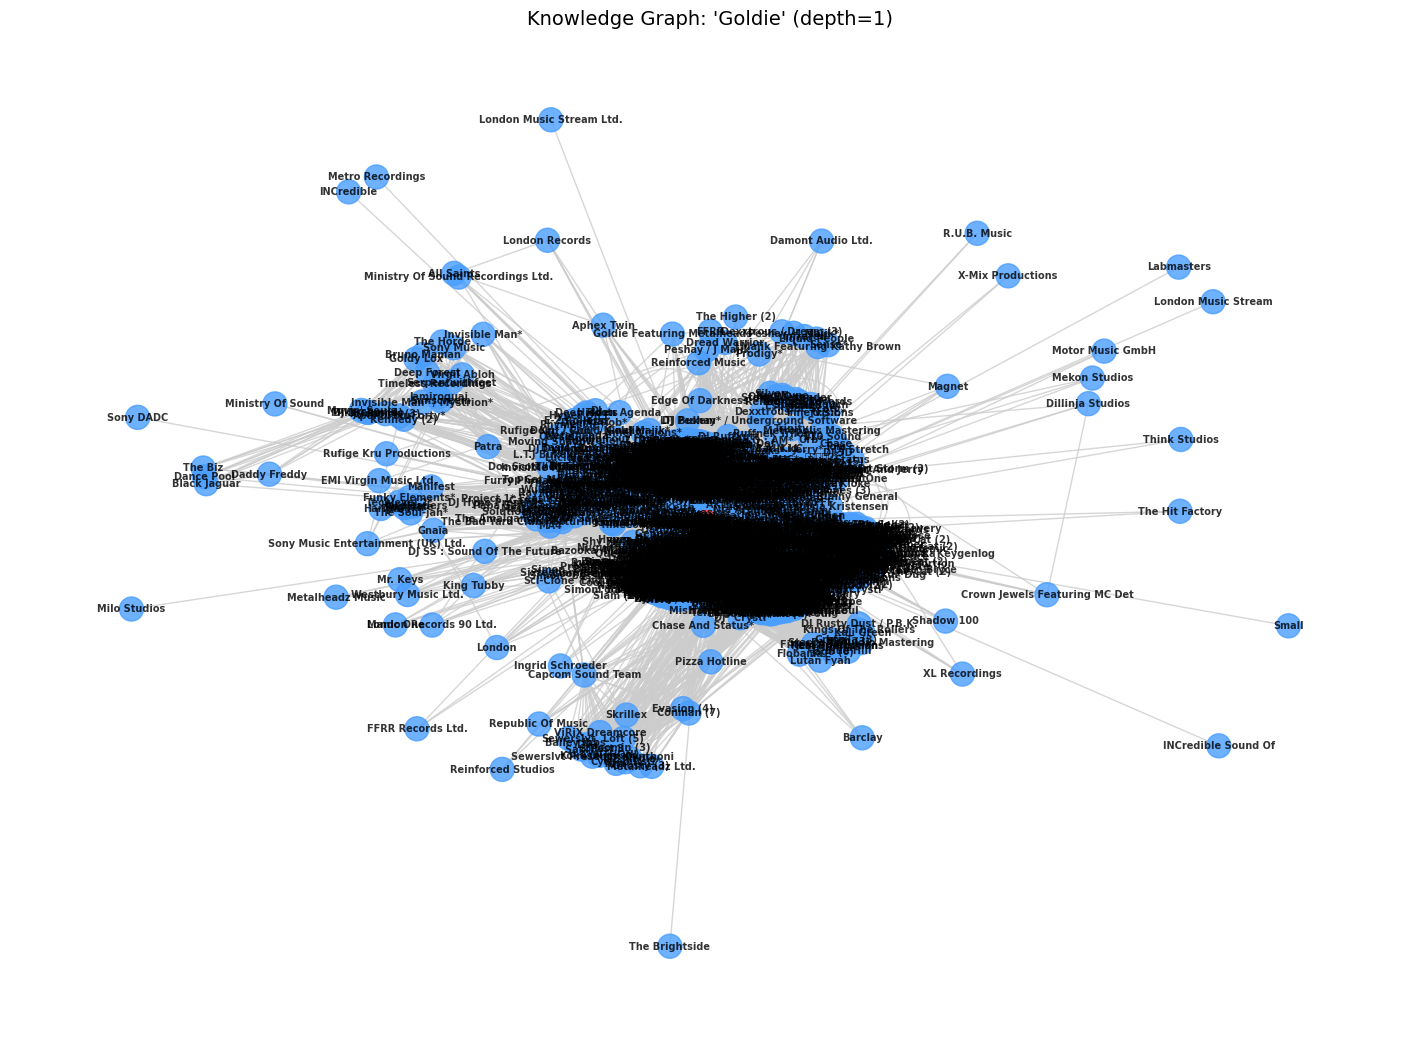

Subgraph: 51 nodes, 1276 edges


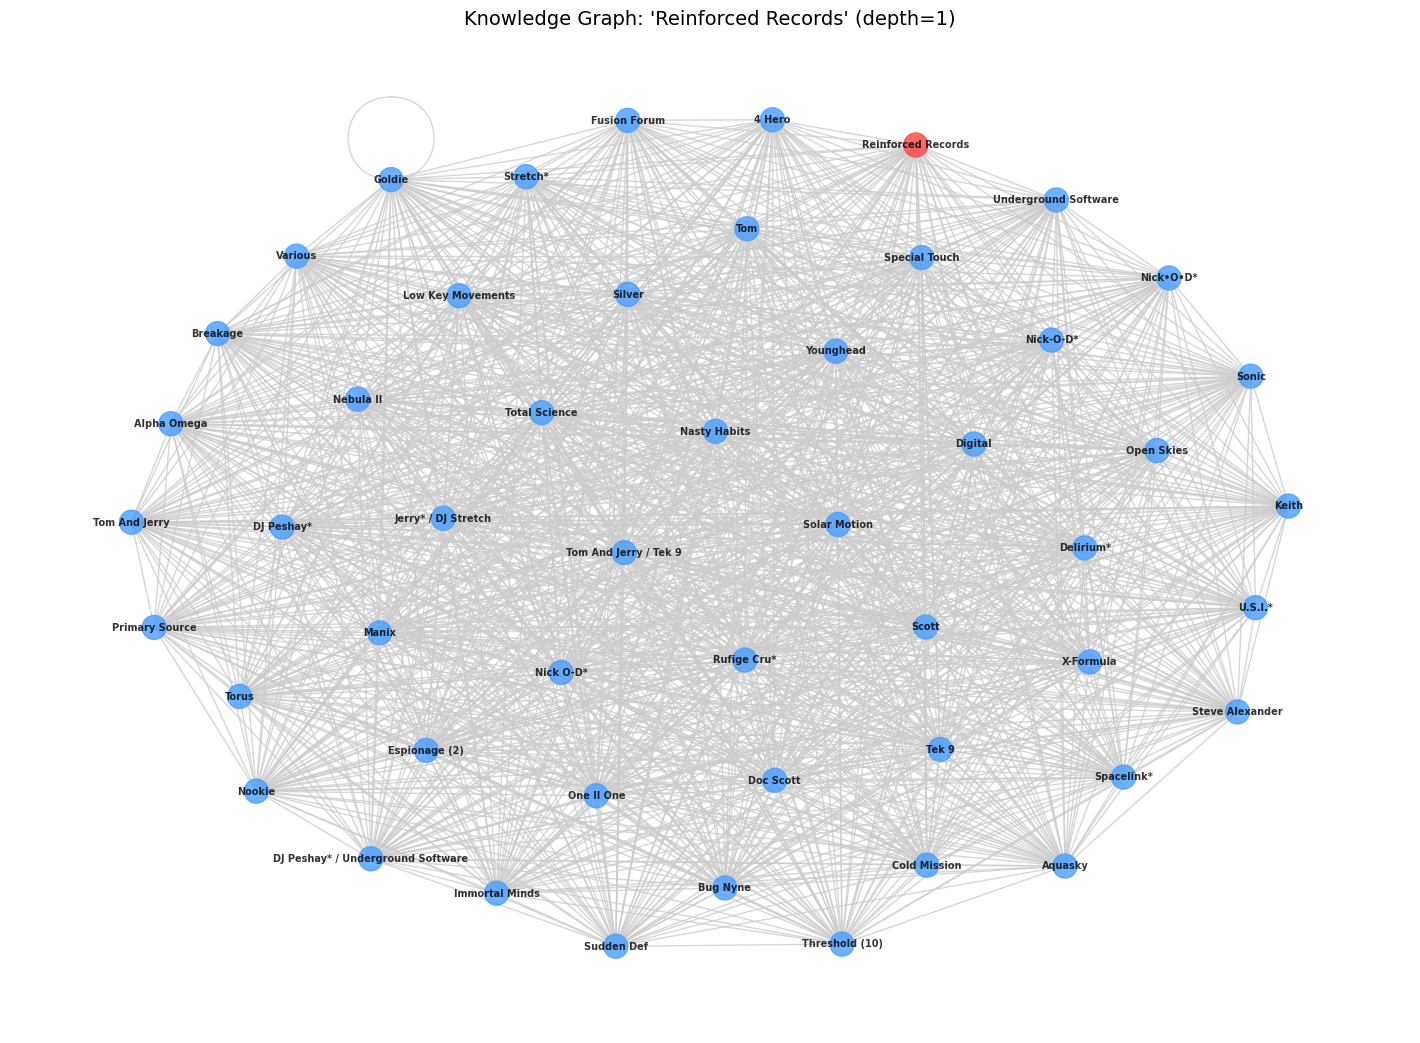

Subgraph: 1195 nodes, 249002 edges


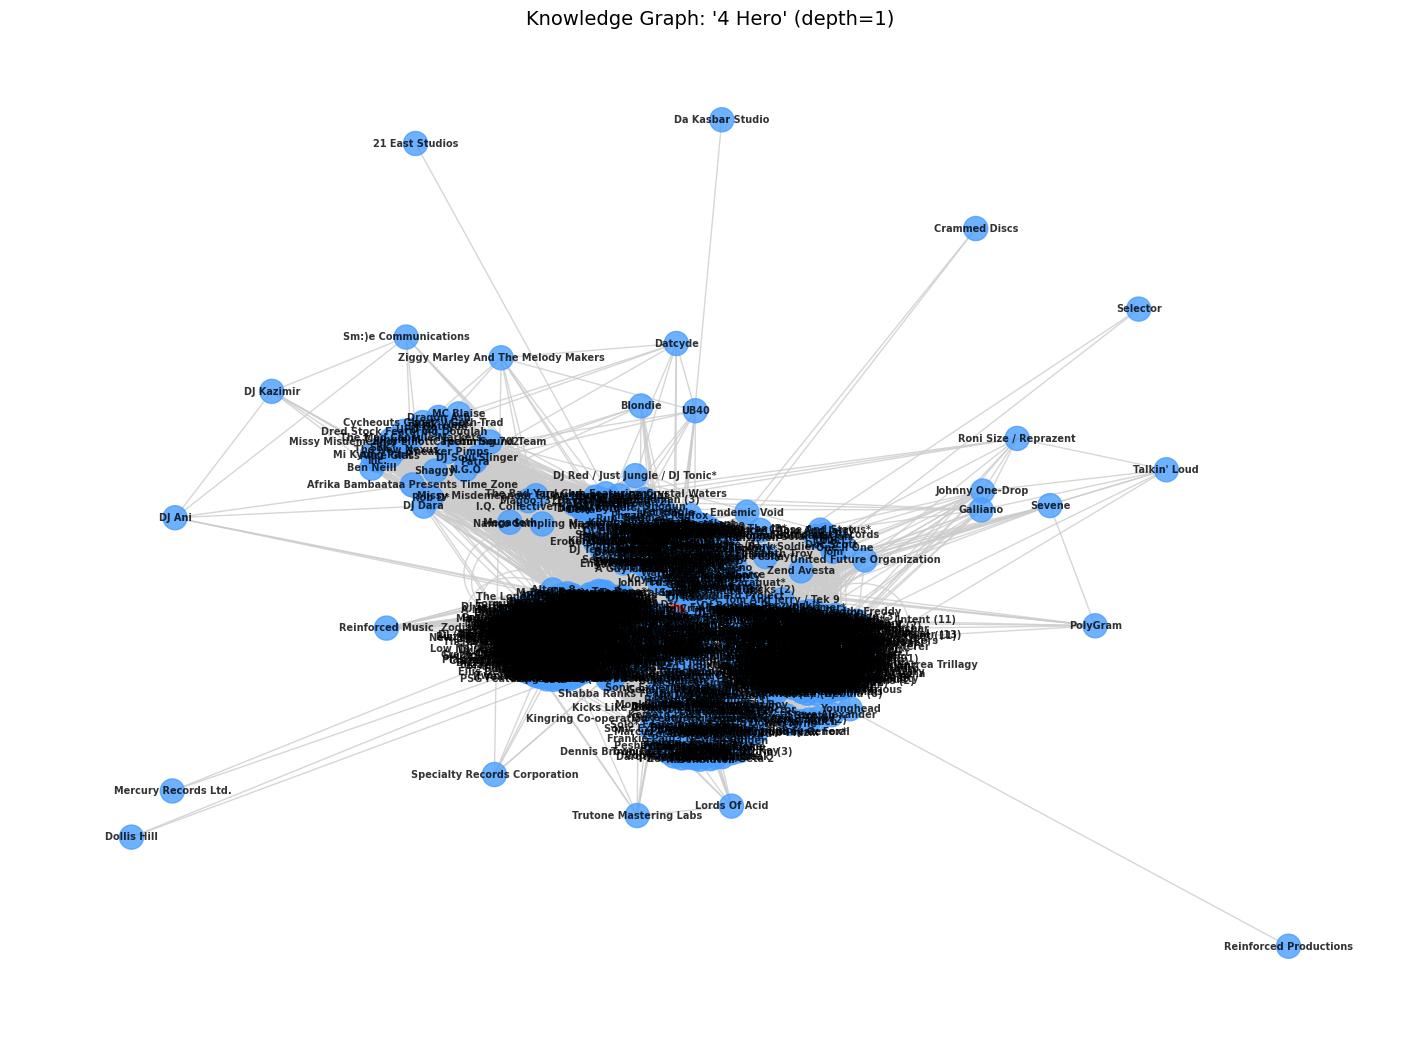

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Load graph
with open('PROCESSING_CSVS/jungle/processed_vinyl/jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Full graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

def plot_subgraph(G, center_node, depth=1):
    """Plot subgraph around a specific node."""
    if center_node not in G:
        print(f"'{center_node}' not in graph. Try these similar:")
        matches = [n for n in G.nodes() if center_node.lower() in n.lower()][:10]
        for m in matches:
            print(f"  - {m}")
        return
    
    # Get nodes within N hops
    nodes = {center_node}
    current = {center_node}
    for _ in range(depth):
        neighbors = set()
        for node in current:
            neighbors.update(G.neighbors(node))
        nodes.update(neighbors)
        current = neighbors
    
    subgraph = G.subgraph(nodes)
    print(f"Subgraph: {subgraph.number_of_nodes()} nodes, {subgraph.number_of_edges()} edges")
    
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)
    
    # Color seed node red
    colors = ['#ff4444' if n == center_node else '#4a9eff' for n in subgraph.nodes()]
    
    nx.draw(subgraph, pos,
            node_size=300,
            node_color=colors,
            edge_color='#cccccc',
            alpha=0.8,
            with_labels=True,
            font_size=7,
            font_weight='bold')
    
    plt.title(f"Knowledge Graph: '{center_node}' (depth={depth})", fontsize=14)
    plt.tight_layout()
    plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
    plt.show()

# === TRY THESE ===
plot_subgraph(G, 'Goldie', depth=1)
plot_subgraph(G, 'Reinforced Records', depth=1)
plot_subgraph(G, '4 Hero', depth=1)

Subgraph: 55 nodes, 427 edges


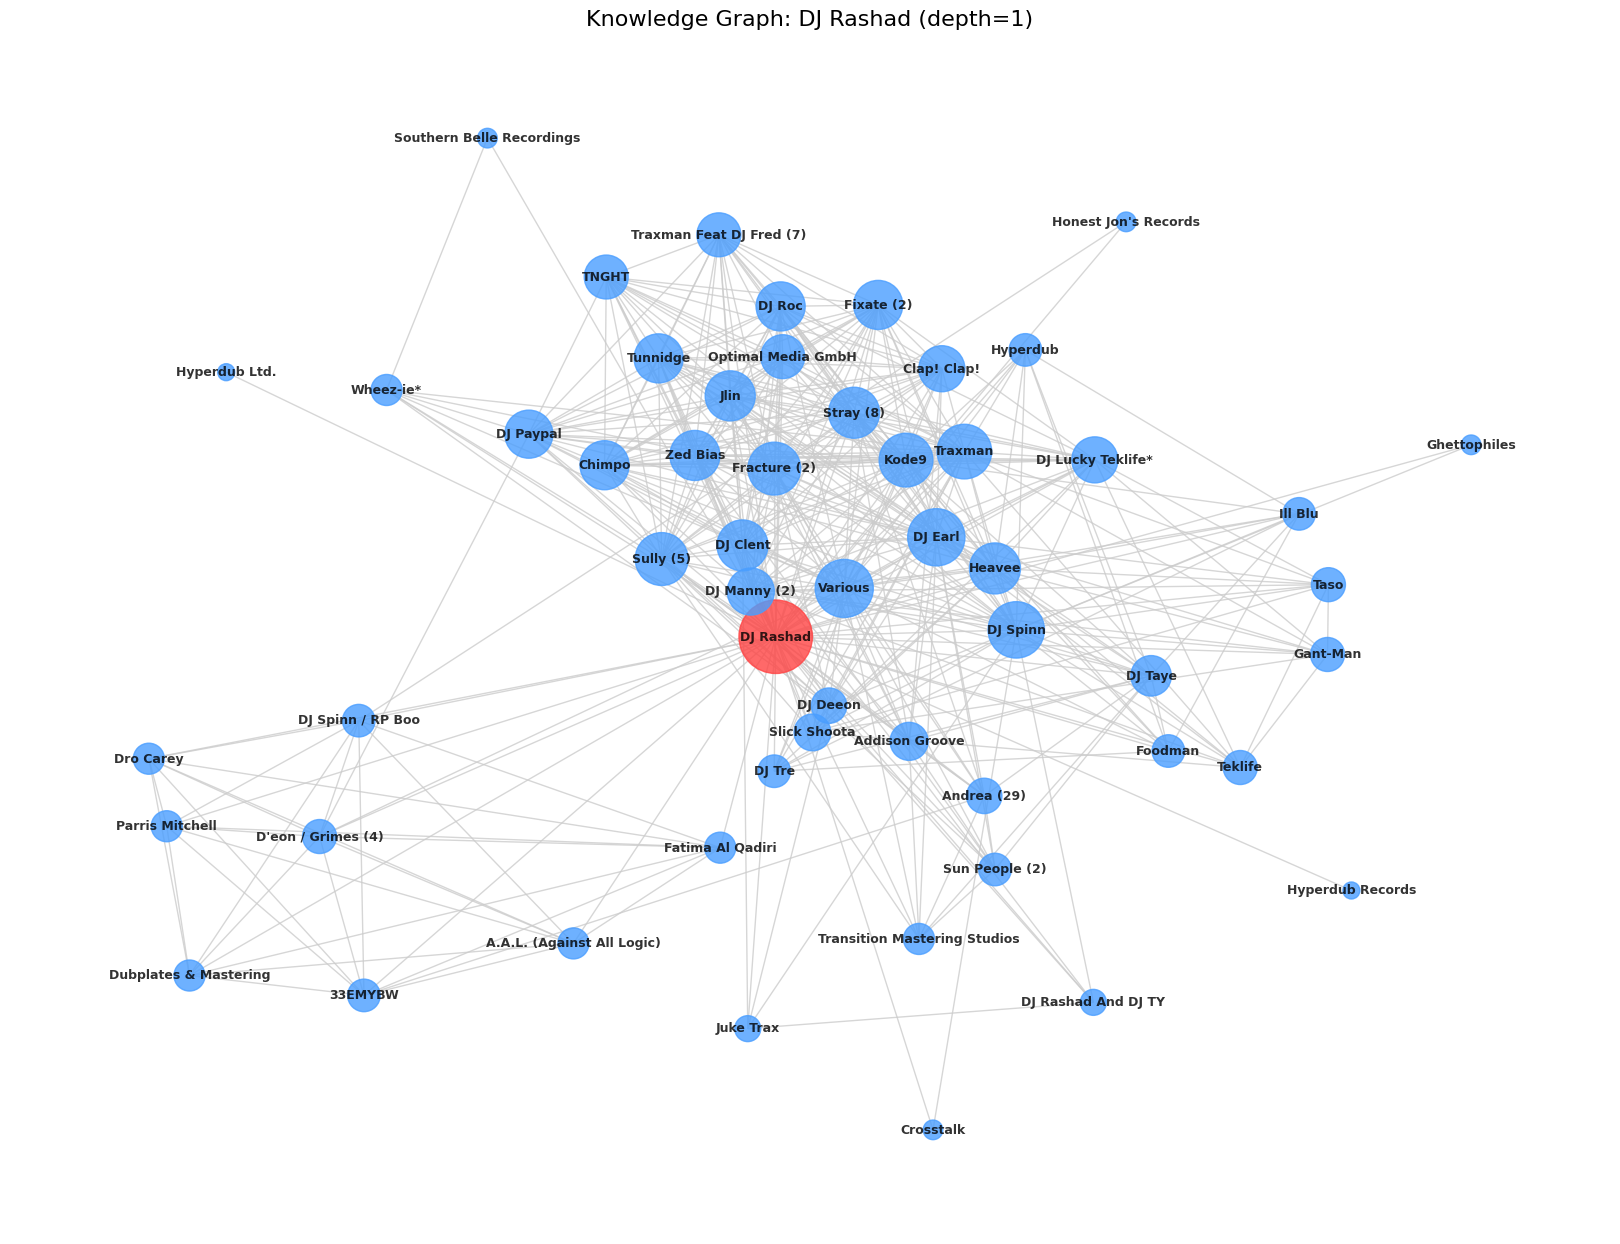

In [23]:
# DJ Rashad subgraph plotting
def plot_clean_subgraph(G, center, depth=1):
    nodes = {center}
    current = {center}
    for _ in range(depth):
        neighbors = set()
        for node in current:
            neighbors.update(G.neighbors(node))
        nodes.update(neighbors)
        current = neighbors
    
    sub = G.subgraph(nodes)
    print(f"Subgraph: {sub.number_of_nodes()} nodes, {sub.number_of_edges()} edges")
    
    plt.figure(figsize=(16, 12), facecolor='white')
    pos = nx.spring_layout(sub, k=2, iterations=100, seed=42)
    
    # Size nodes by degree
    sizes = [sub.degree(n) * 50 + 100 for n in sub.nodes()]
    colors = ['#ff4444' if n == center else '#4a9eff' for n in sub.nodes()]
    
    nx.draw(sub, pos, node_size=sizes, node_color=colors, 
            edge_color='#cccccc', alpha=0.8, with_labels=True,
            font_size=9, font_weight='bold')
    
    plt.title(f"Knowledge Graph: {center} (depth={depth})", fontsize=16)
    plt.axis('off')
    plt.savefig(f'subgraph_{center.replace(" ", "_")}.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.show()

# Check if DJ Rashad is in there
if 'DJ Rashad' in G:
    plot_clean_subgraph(G, 'DJ Rashad', depth=1)
else:
    # Find similar
    matches = [n for n in G.nodes() if 'rashad' in n.lower()]
    print("Rashad matches:", matches)

Main cluster: 269 nodes, 1092 edges


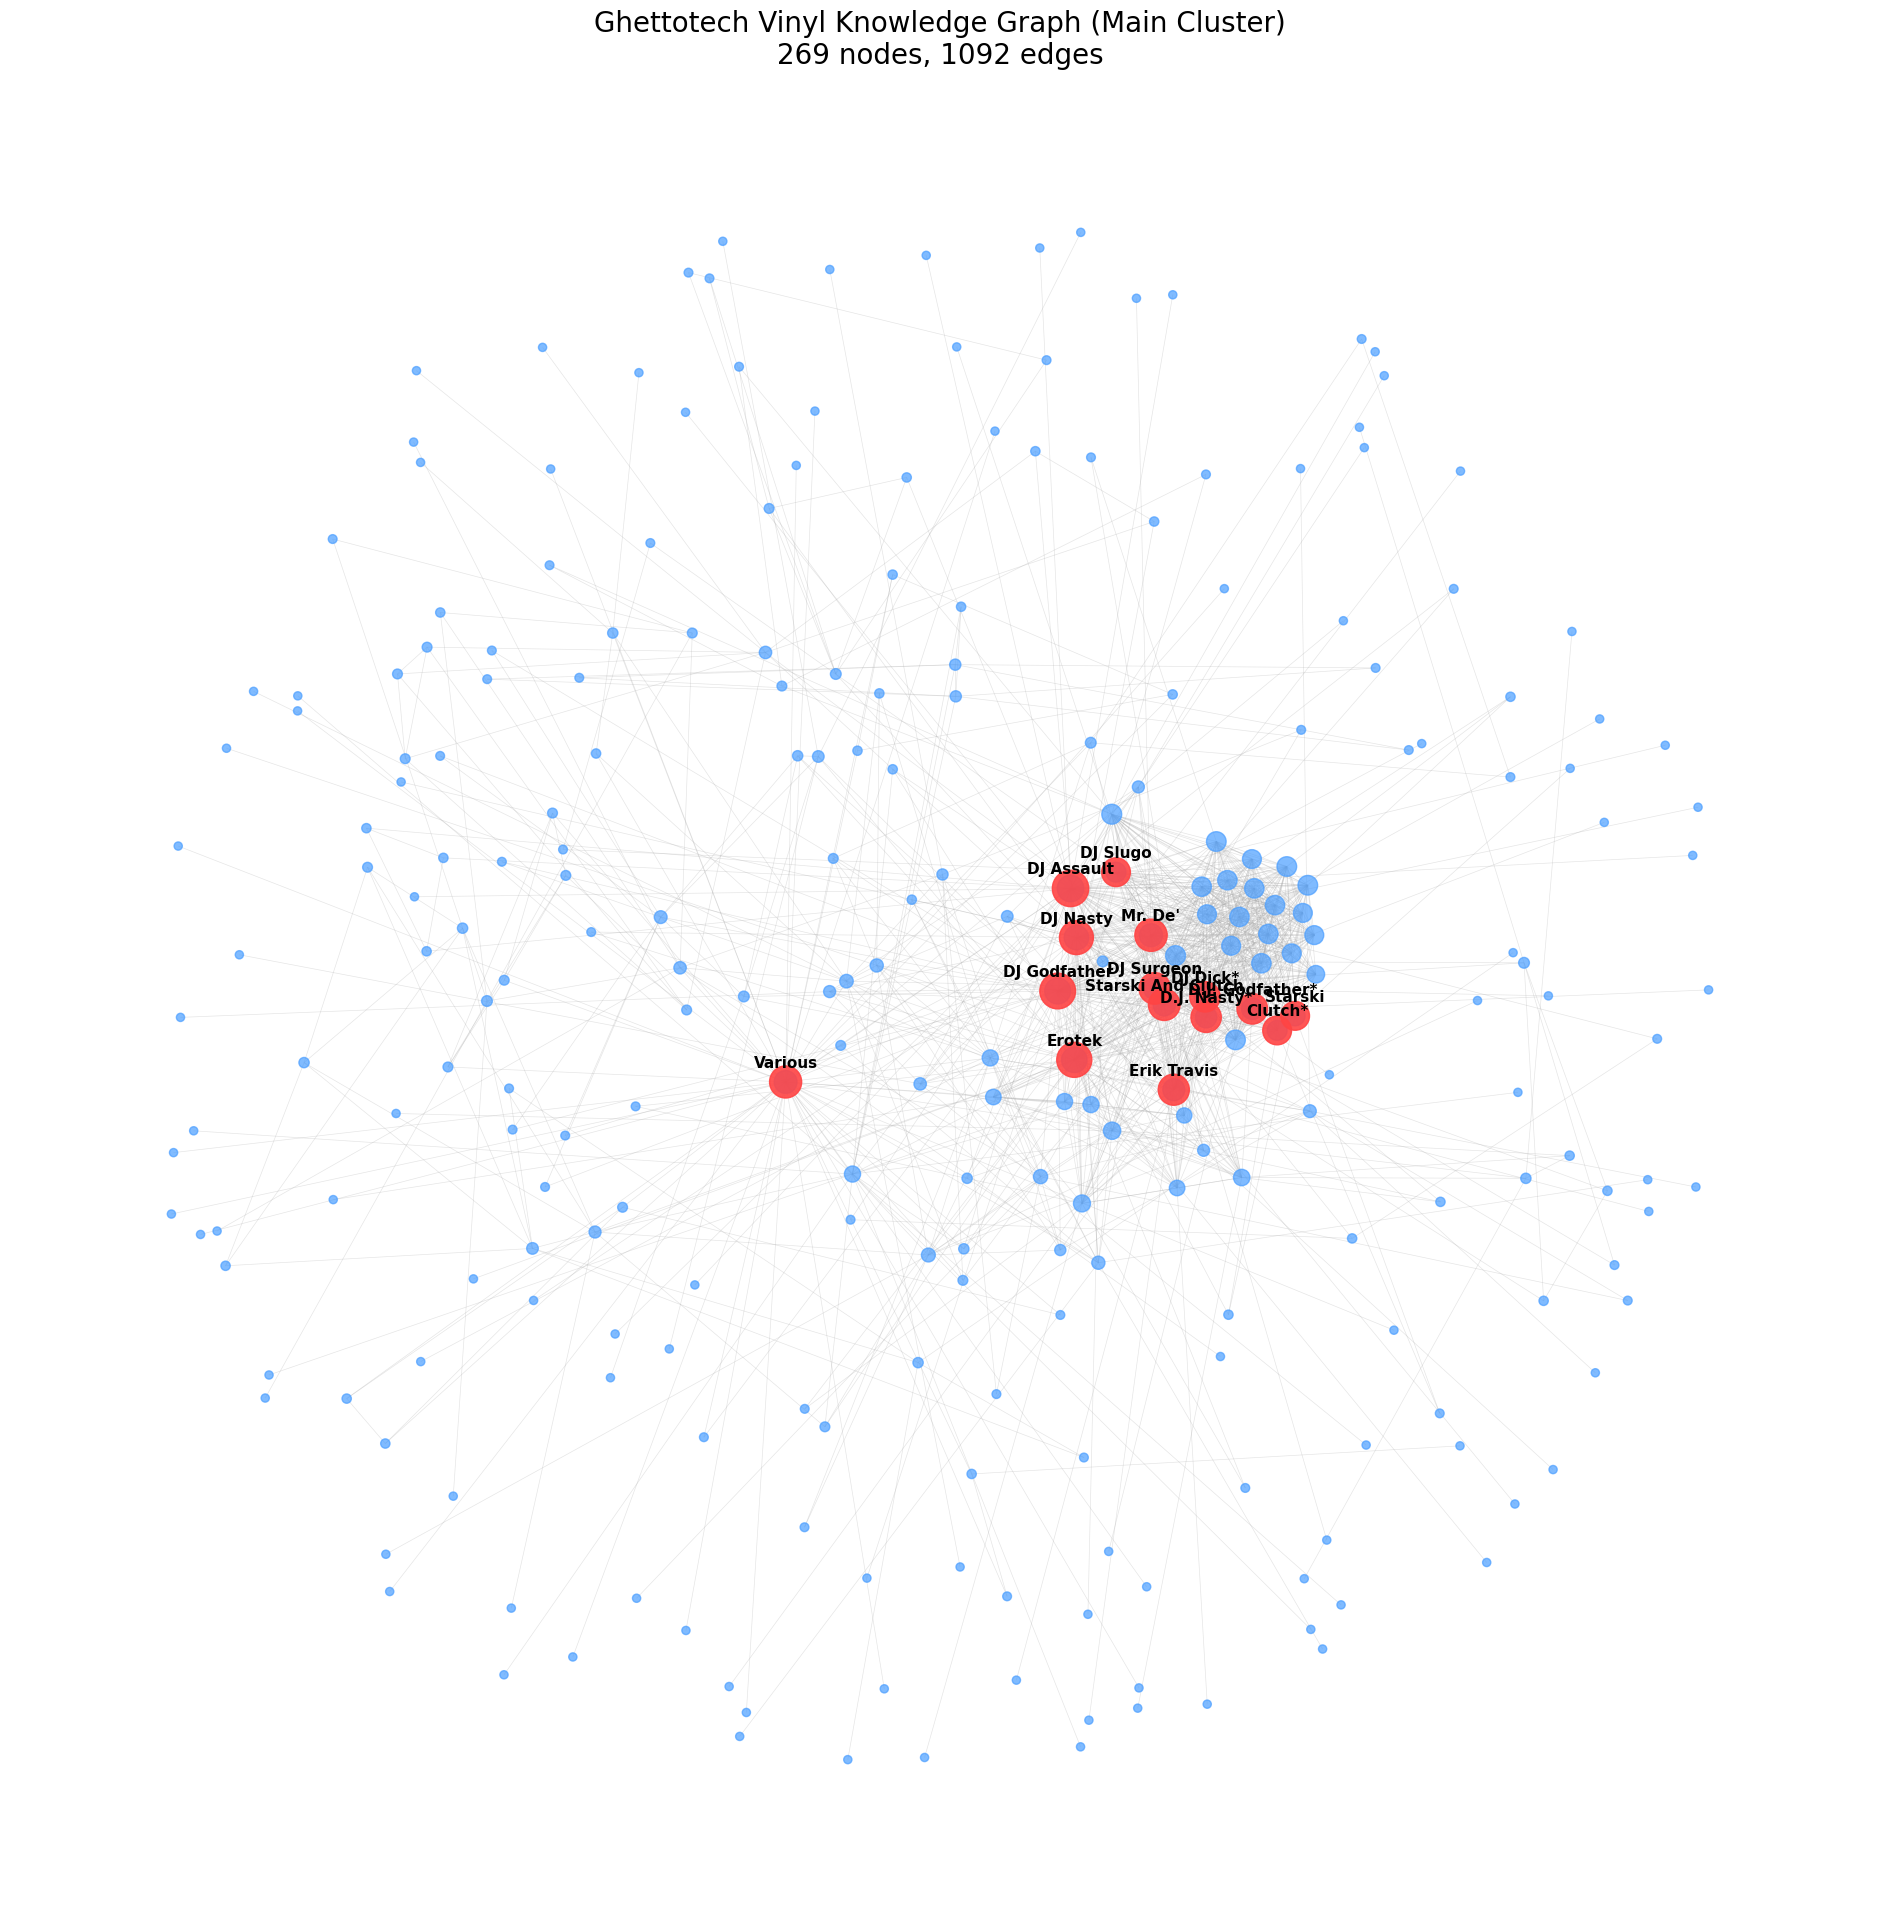


Top 15 most connected:
  DJ Assault: 67 connections
  DJ Godfather: 64 connections
  Erotek: 61 connections
  DJ Nasty: 56 connections
  Mr. De': 49 connections
  Various: 48 connections
  Starski And Clutch: 46 connections
  DJ Surgeon: 46 connections
  Erik Travis: 44 connections
  D.J. Godfather*: 42 connections
  D.J. Nasty*: 41 connections
  DJ Dick*: 41 connections
  DJ Slugo: 35 connections
  Clutch*: 35 connections
  Starski: 35 connections


In [25]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Load ghettotech graph
with open('PROCESSING_CSVS/ghettotech/processed_vinyl/ghettotech_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

# Keep only the largest connected component (removes outliers)
largest_cc = max(nx.connected_components(G), key=len)
G_main = G.subgraph(largest_cc).copy()

print(f"Main cluster: {G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges")

# Plot
plt.figure(figsize=(24, 24), facecolor='white')
pos = nx.spring_layout(G_main, k=0.8, iterations=100, seed=42)

# Draw edges
nx.draw_networkx_edges(G_main, pos, edge_color='#aaaaaa', alpha=0.3, width=0.5)

# Draw all nodes - size by connections
node_sizes = [G_main.degree(n) * 5 + 30 for n in G_main.nodes()]
nx.draw_networkx_nodes(G_main, pos, node_size=node_sizes, node_color='#4a9eff', alpha=0.7)

# Top 15 most connected - highlight and label
top_nodes = sorted(G_main.degree(), key=lambda x: x[1], reverse=True)[:15]
top_node_names = [n[0] for n in top_nodes]

nx.draw_networkx_nodes(G_main, pos, nodelist=top_node_names, 
                       node_size=[G_main.degree(n) * 8 + 150 for n in top_node_names], 
                       node_color='#ff4444', alpha=0.9)

# Offset labels
label_pos = {k: (v[0], v[1] + 0.025) for k, v in pos.items()}
top_labels = {n: n for n in top_node_names}
nx.draw_networkx_labels(G_main, label_pos, top_labels, font_size=11, font_weight='bold')

plt.title(f"Ghettotech Vinyl Knowledge Graph (Main Cluster)\n{G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges", fontsize=20)
plt.axis('off')
plt.savefig('ghettotech_graph_main.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

# Print top connected
print("\nTop 15 most connected:")
for name, degree in top_nodes:
    print(f"  {name}: {degree} connections")

In [26]:
import pickle
import os

BASE_PATH = 'PROCESSING_CSVS'

# Check all genre graphs
for folder in sorted(os.listdir(BASE_PATH)):
    if folder == '_combined' or folder.startswith('.'):
        continue
    
    graph_path = os.path.join(BASE_PATH, folder, 'processed_vinyl', f'{folder}_vinyl_graph.pkl')
    
    if os.path.exists(graph_path):
        with open(graph_path, 'rb') as f:
            G = pickle.load(f)
        print(f"{folder}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    else:
        print(f"{folder}: no vinyl graph")

acid_house: 19920 nodes, 349408 edges
baltimore_club: 606 nodes, 2044 edges
bassline: 1624 nodes, 3544 edges
bleep: 1887 nodes, 10017 edges
breakbeat: 33430 nodes, 1448675 edges
breakbeat_acid: 2971 nodes, 10104 edges
breakbeat_happy_hardcore: 1126 nodes, 12583 edges
breakbeat_hardcore: 7051 nodes, 312724 edges
breakbeat_hardcore_happy_hardcore: 601 nodes, 3468 edges
breakbeat_hardcore_jungle: 1923 nodes, 40411 edges
breakbeat_hardcore_techno: 2230 nodes, 17561 edges
breakbeat_house: 8694 nodes, 57821 edges
dj_battle_tool: 2508 nodes, 6700 edges
dnb: 25915 nodes, 2679809 edges
donk: 1359 nodes, 21132 edges
dub_jungle: 654 nodes, 1144 edges
dubstep: 8263 nodes, 246120 edges
electro: 66284 nodes, 3915388 edges
electro_funk: 5483 nodes, 51687 edges
footwork: 581 nodes, 1440 edges
freetekno: 3661 nodes, 96022 edges
gabber: 5036 nodes, 188635 edges
ghetto: 2266 nodes, 16057 edges
ghetto_house: 1433 nodes, 12952 edges
ghettotech: 570 nodes, 1332 edges
happy_hardcore: 6159 nodes, 142721 edges

Hardcore Techno Jungle: 287 nodes, 569 edges
Main cluster: 180 nodes, 479 edges


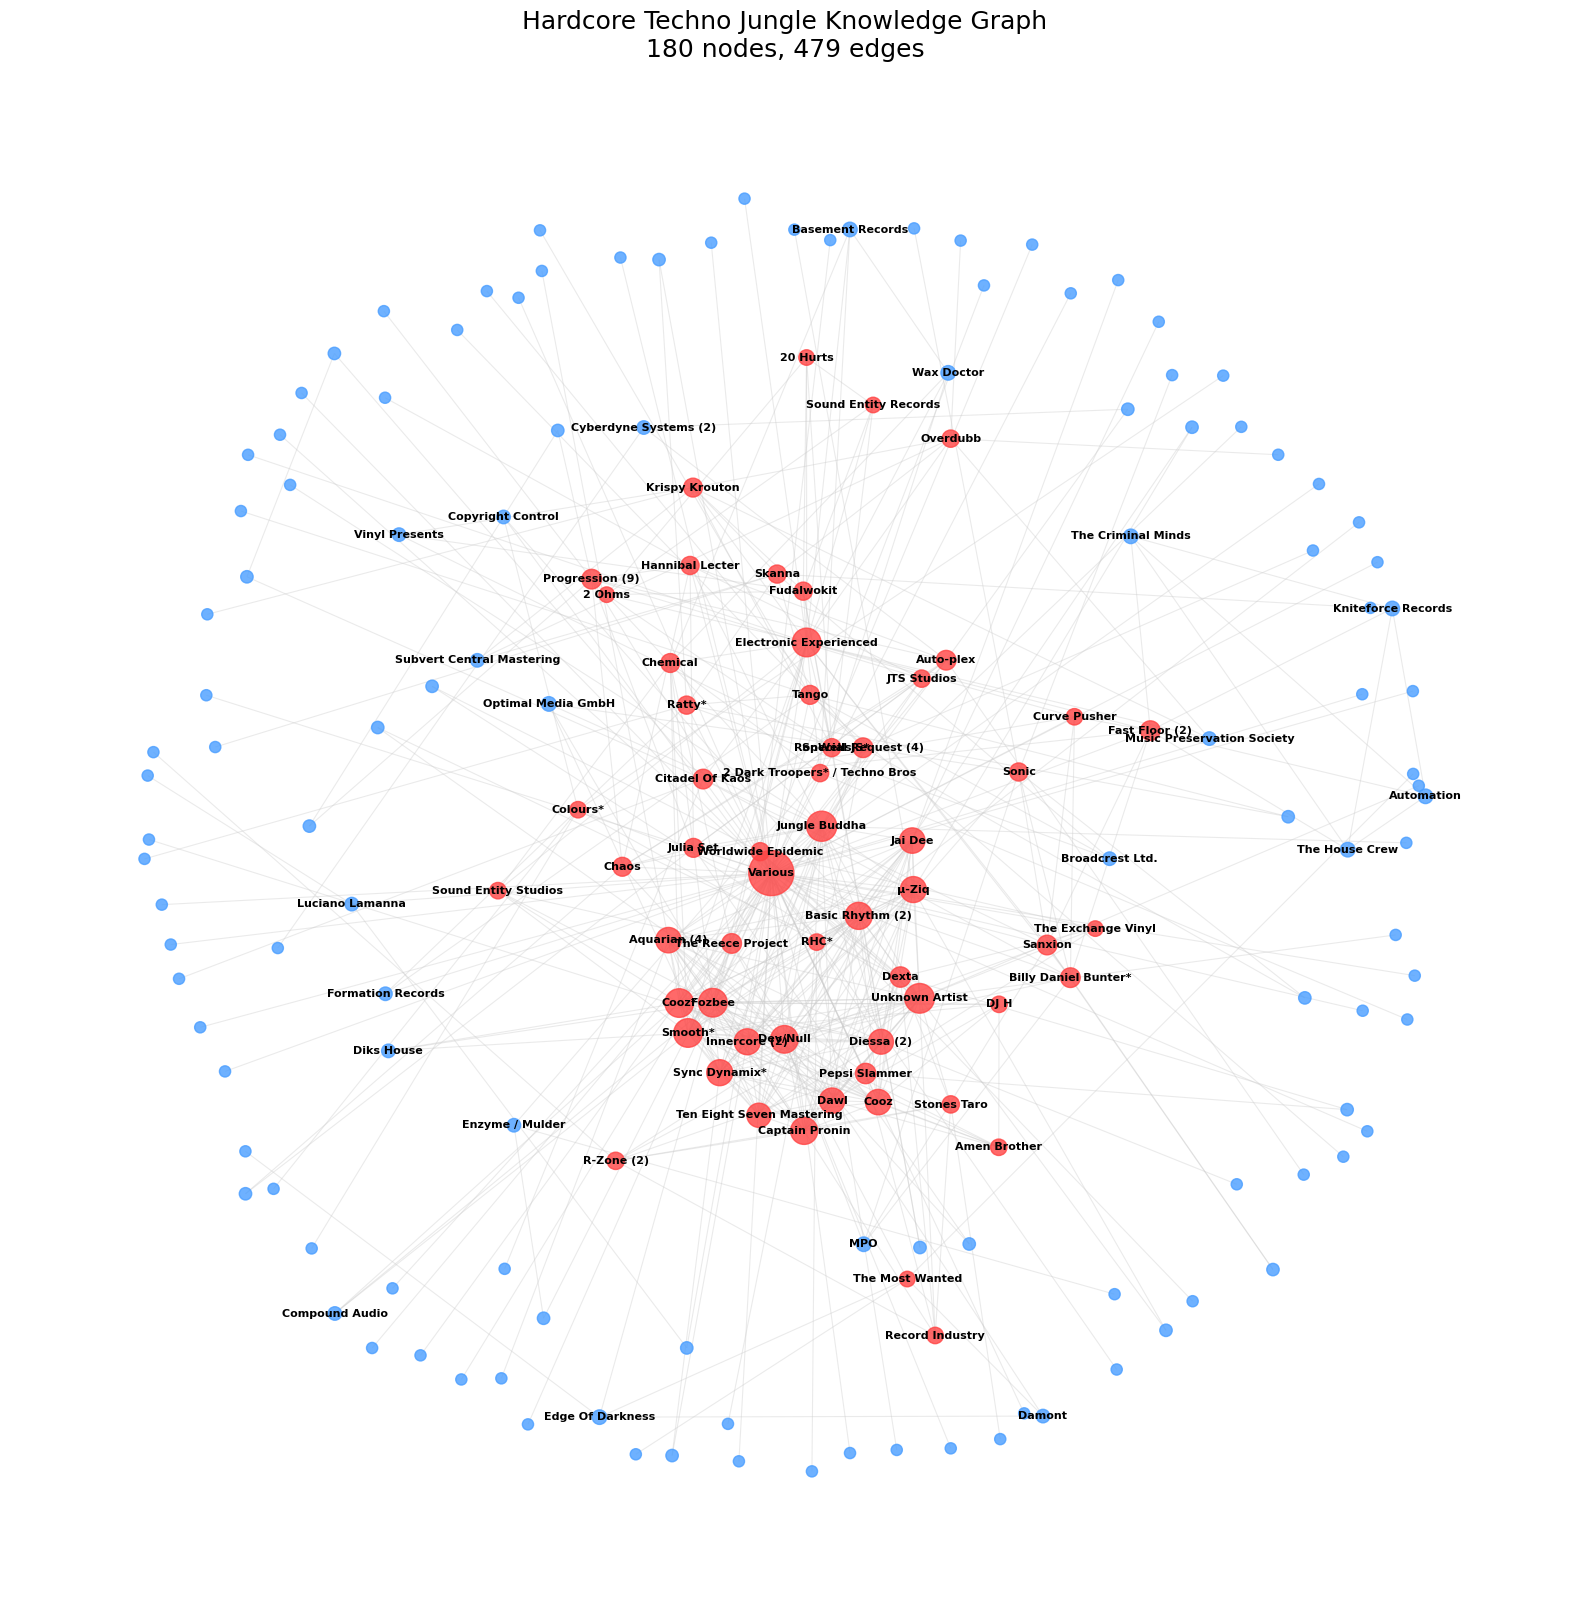

In [27]:
# Load hardcore_techno_jungle
with open('PROCESSING_CSVS/hardcore_techno_jungle/processed_vinyl/hardcore_techno_jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Hardcore Techno Jungle: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Get main cluster
largest_cc = max(nx.connected_components(G), key=len)
G_main = G.subgraph(largest_cc).copy()

print(f"Main cluster: {G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges")

# Plot
plt.figure(figsize=(20, 20), facecolor='white')
pos = nx.spring_layout(G_main, k=1.2, iterations=100, seed=42)

# Size by connections
node_sizes = [G_main.degree(n) * 15 + 50 for n in G_main.nodes()]
colors = ['#ff4444' if G_main.degree(n) >= 5 else '#4a9eff' for n in G_main.nodes()]

nx.draw_networkx_edges(G_main, pos, edge_color='#cccccc', alpha=0.4, width=0.8)
nx.draw_networkx_nodes(G_main, pos, node_size=node_sizes, node_color=colors, alpha=0.8)

# Label nodes with 3+ connections
labels = {n: n for n in G_main.nodes() if G_main.degree(n) >= 3}
nx.draw_networkx_labels(G_main, pos, labels, font_size=8, font_weight='bold')

plt.title(f"Hardcore Techno Jungle Knowledge Graph\n{G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges", fontsize=18)
plt.axis('off')
plt.savefig('hardcore_techno_jungle_graph.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()